In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from string import punctuation
import re
from global_values import *
from torch.utils.tensorboard import SummaryWriter   
from face_model.model_config import *
from face_model.models import *
from face_model.common import *

In [6]:
files = [file for file in os.listdir('./data/text/') if file.endswith('.csv')]
files

['300_TRANSCRIPT.csv',
 '301_TRANSCRIPT.csv',
 '302_TRANSCRIPT.csv',
 '303_TRANSCRIPT.csv',
 '304_TRANSCRIPT.csv',
 '305_TRANSCRIPT.csv',
 '306_TRANSCRIPT.csv',
 '307_TRANSCRIPT.csv',
 '308_TRANSCRIPT.csv',
 '309_TRANSCRIPT.csv',
 '310_TRANSCRIPT.csv',
 '311_TRANSCRIPT.csv',
 '312_TRANSCRIPT.csv',
 '313_TRANSCRIPT.csv',
 '314_TRANSCRIPT.csv',
 '315_TRANSCRIPT.csv',
 '316_TRANSCRIPT.csv',
 '317_TRANSCRIPT.csv',
 '318_TRANSCRIPT.csv',
 '319_TRANSCRIPT.csv',
 '320_TRANSCRIPT.csv',
 '321_TRANSCRIPT.csv',
 '322_TRANSCRIPT.csv',
 '323_TRANSCRIPT.csv',
 '324_TRANSCRIPT.csv',
 '325_TRANSCRIPT.csv',
 '326_TRANSCRIPT.csv',
 '327_TRANSCRIPT.csv',
 '328_TRANSCRIPT.csv',
 '329_TRANSCRIPT.csv',
 '330_TRANSCRIPT.csv',
 '331_TRANSCRIPT.csv',
 '332_TRANSCRIPT.csv',
 '333_TRANSCRIPT.csv',
 '334_TRANSCRIPT.csv',
 '335_TRANSCRIPT.csv',
 '336_TRANSCRIPT.csv',
 '337_TRANSCRIPT.csv',
 '338_TRANSCRIPT.csv',
 '339_TRANSCRIPT.csv',
 '340_TRANSCRIPT.csv',
 '341_TRANSCRIPT.csv',
 '343_TRANSCRIPT.csv',
 '344_TRANS

In [18]:
train = pd.read_csv('./data/train_split_Depression_AVEC2017.csv')
train.head()

,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving
0,303,0,0,0,0,0,0.0,0,0,0,0,0
1,304,0,6,0,0,1,1.0,2,2,0,0,0
2,305,0,7,1,0,1,1.0,2,2,1,0,0
3,310,0,4,1,1,1,0.0,0,0,1,1,0
4,312,0,2,1,0,0,1.0,1,0,0,0,0


In [20]:
valid = pd.read_csv('./data/dev_split_Depression_AVEC2017.csv')
valid.head()

,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving
0,302,0,4,1,1,1,0,1,0,1,0,0
1,307,0,4,0,0,1,0,1,0,2,0,0
2,331,0,8,1,1,1,1,1,1,1,1,1
3,335,1,12,0,1,1,3,2,3,1,1,0
4,346,1,23,0,2,3,3,3,3,3,3,3


In [21]:
test = pd.read_csv('./data/full_test_split.csv')
test.head()

,Participant_ID,PHQ_Binary,PHQ_Score,Gender
0,300,0,2,1
1,301,0,3,1
2,306,0,0,0
3,308,1,22,0
4,309,1,15,1


In [28]:
test.rename(columns={'PHQ_Binary':'PHQ8_Binary'},inplace=True)

In [30]:
people = pd.concat([test[['Participant_ID','PHQ8_Binary']],valid[['Participant_ID','PHQ8_Binary']],train[['Participant_ID','PHQ8_Binary']]])
people

,Participant_ID,PHQ8_Binary
0,300,0
1,301,0
2,306,0
3,308,1
4,309,1
5,311,1
6,314,0
7,323,0
8,329,0
9,332,1


In [35]:
people[people.Participant_ID==ID].PHQ8_Binary.valies

0    0
Name: PHQ8_Binary, dtype: int64

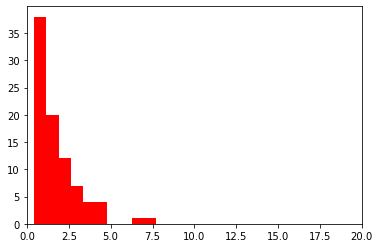

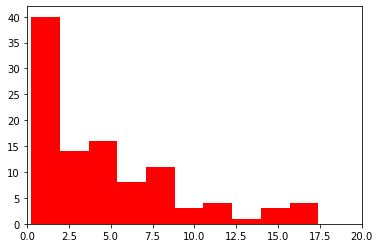

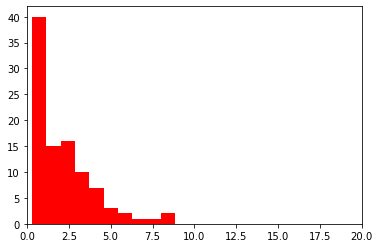

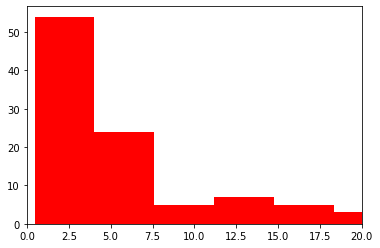

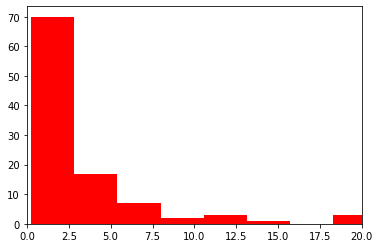

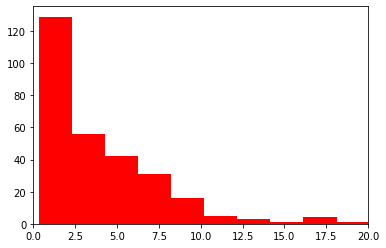

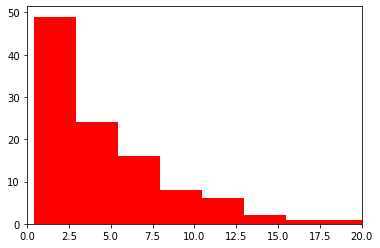

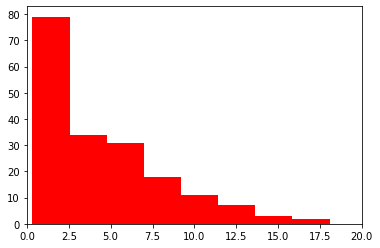

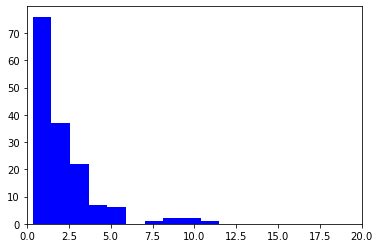

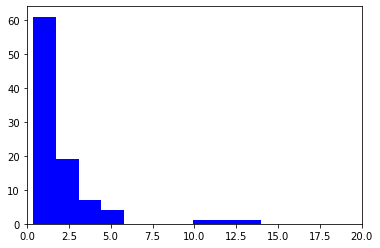

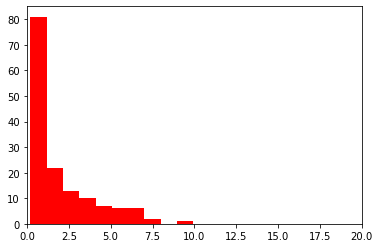

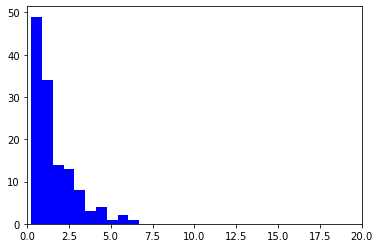

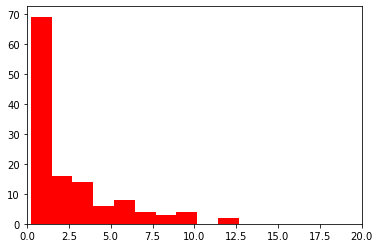

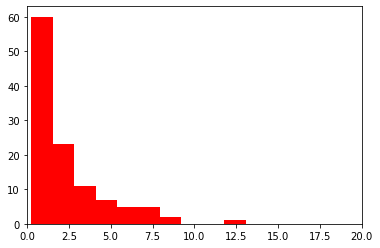

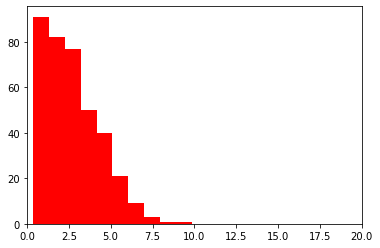

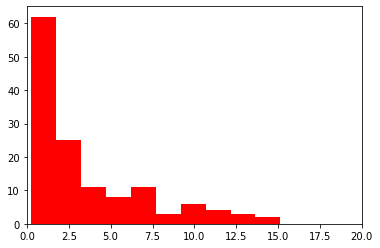

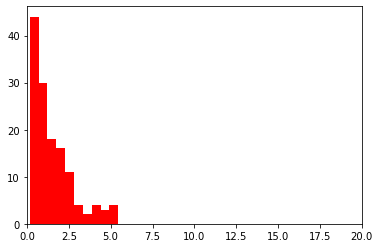

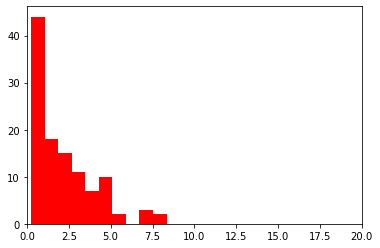

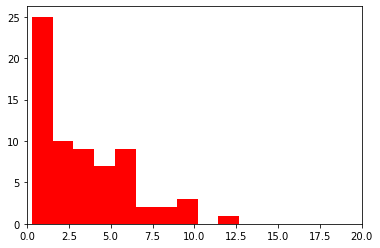

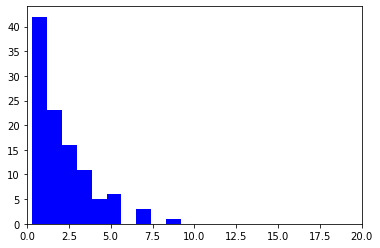

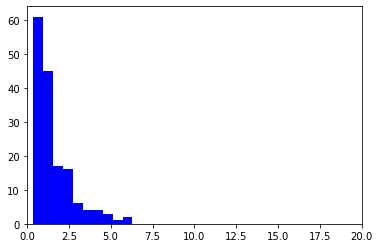

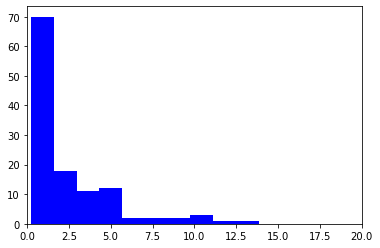

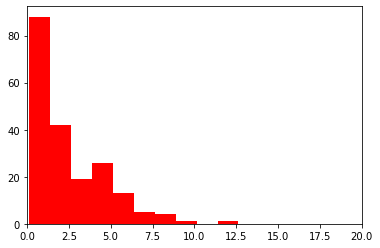

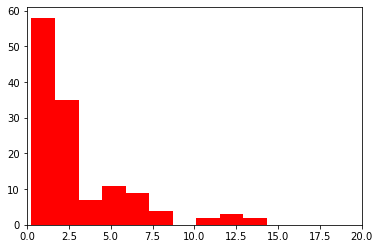

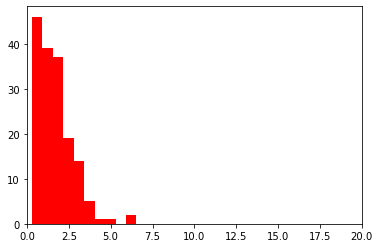

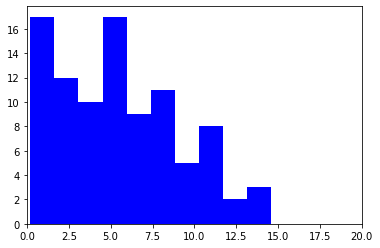

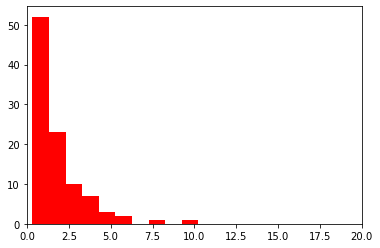

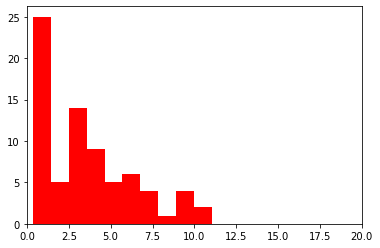

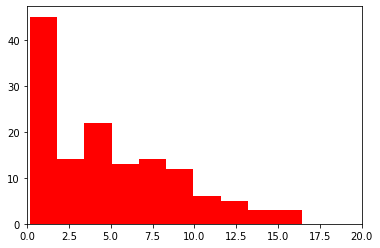

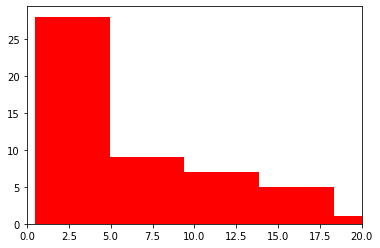

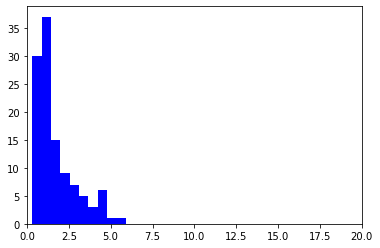

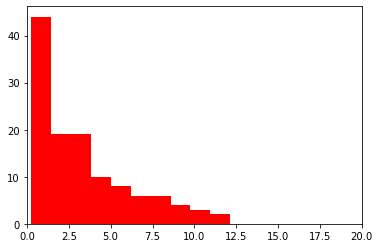

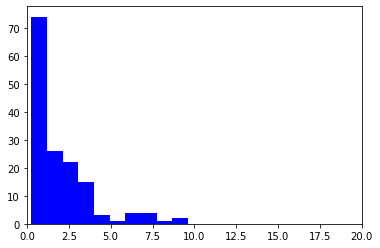

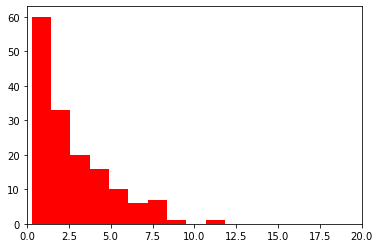

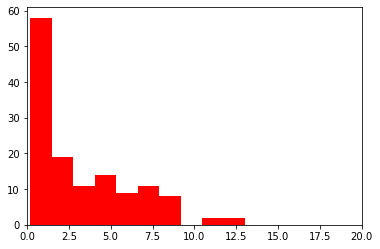

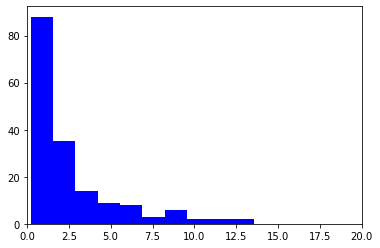

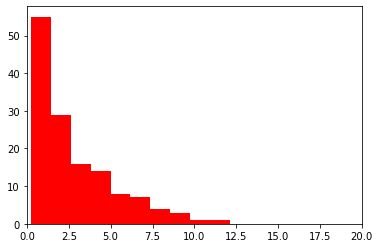

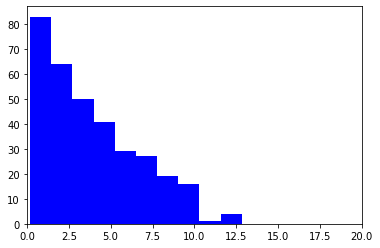

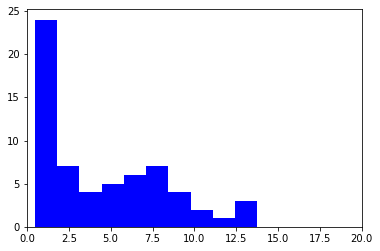

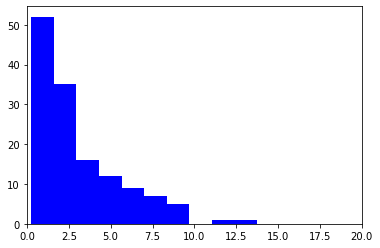

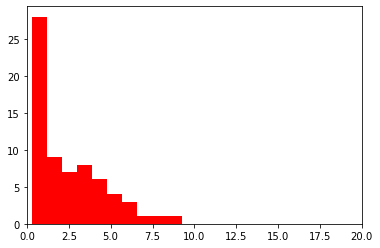

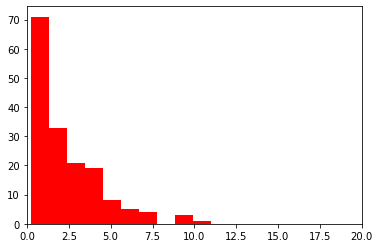

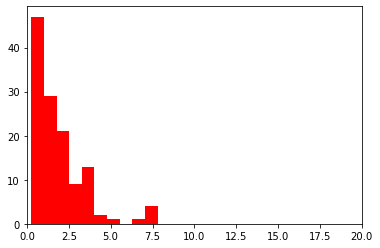

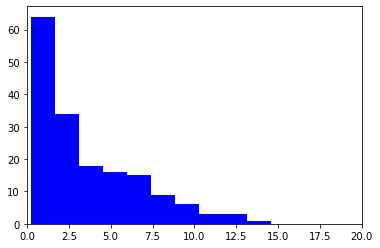

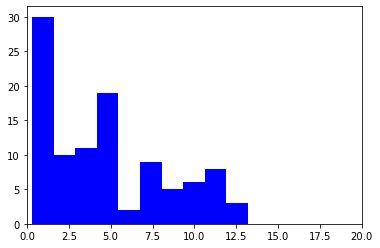

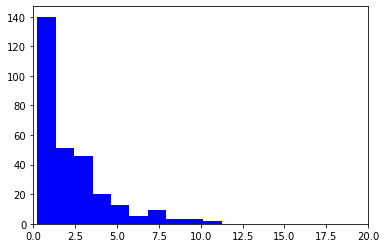

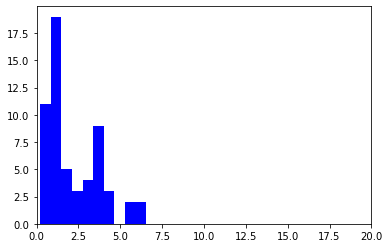

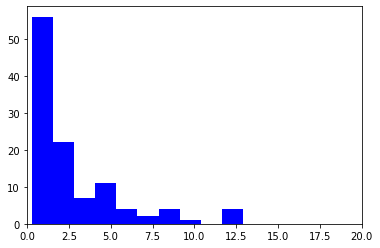

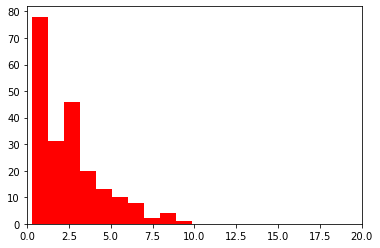

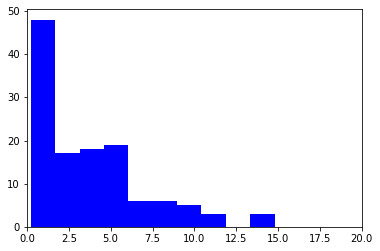

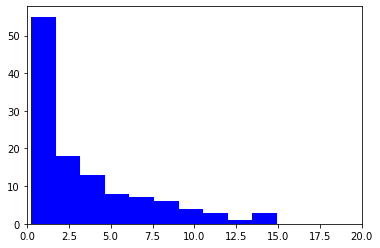

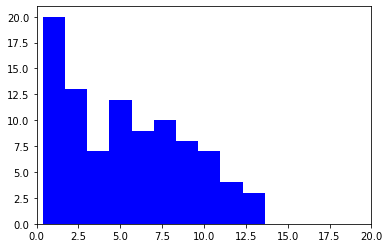

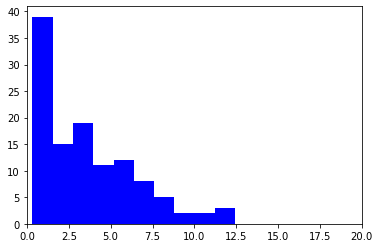

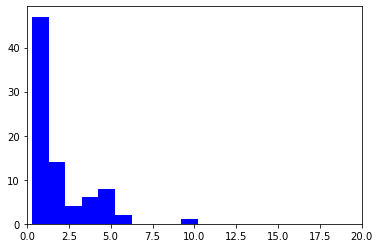

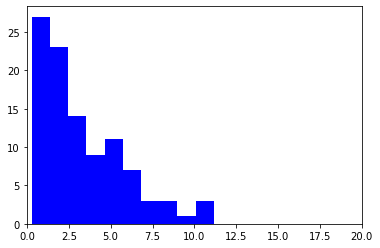

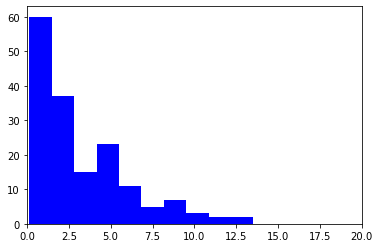

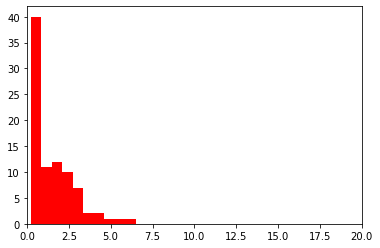

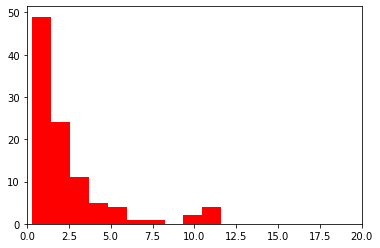

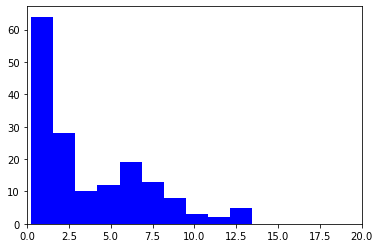

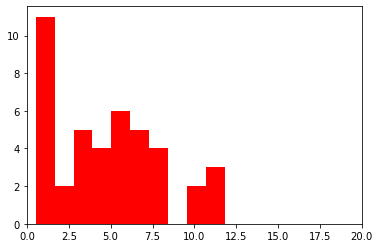

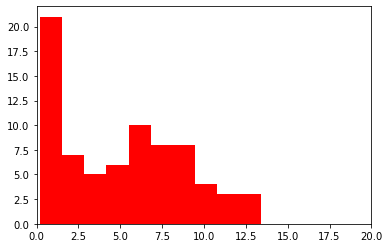

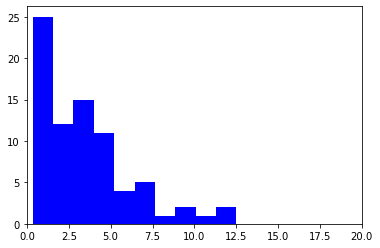

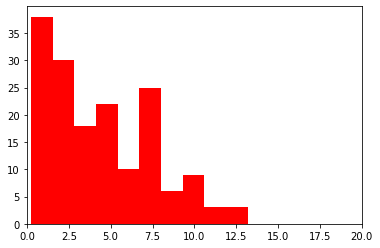

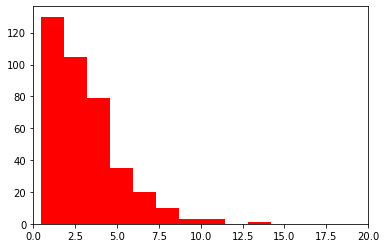

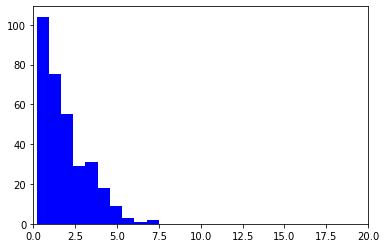

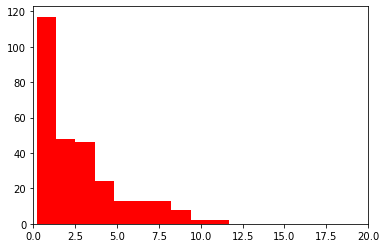

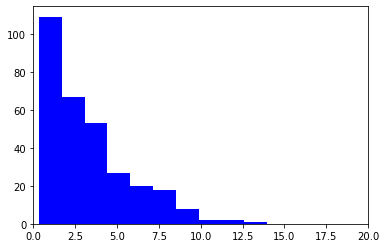

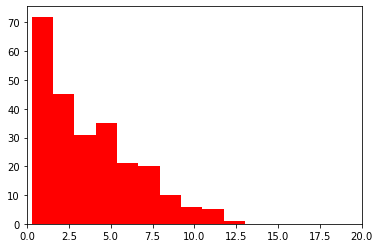

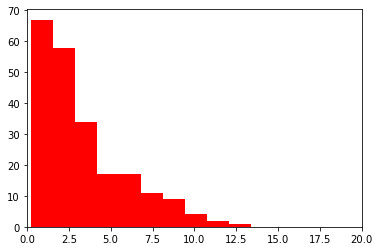

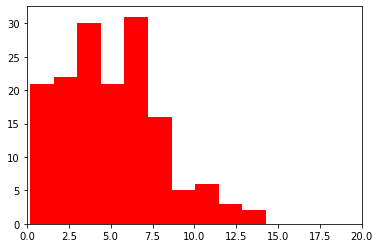

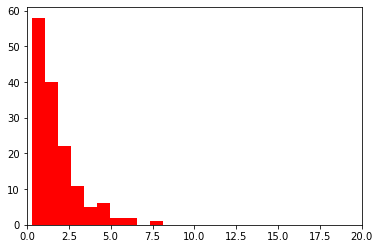

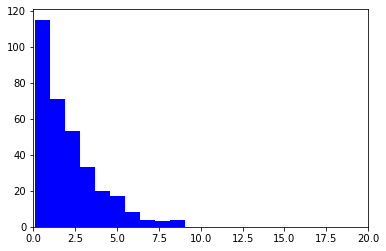

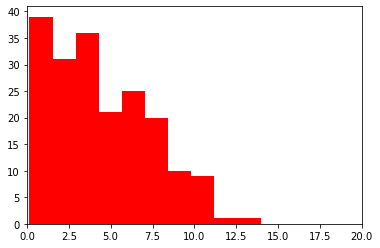

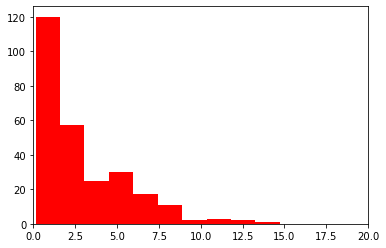

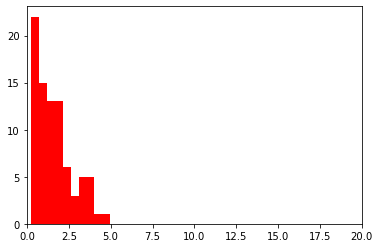

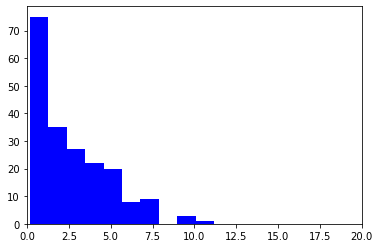

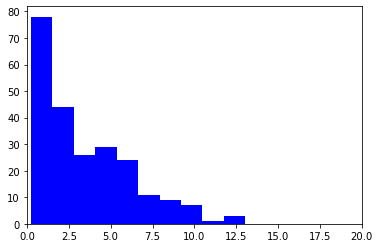

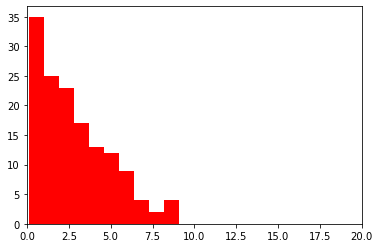

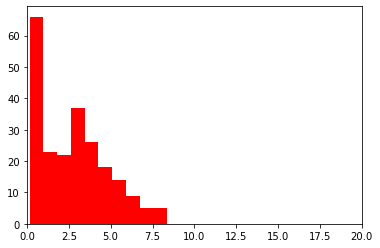

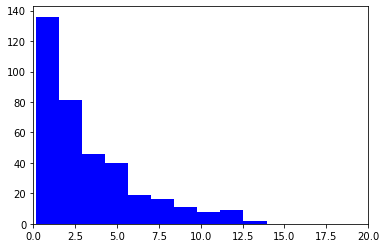

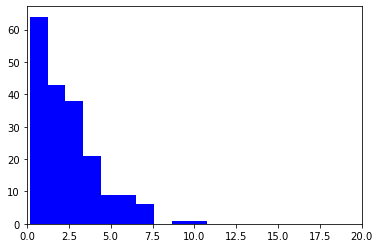

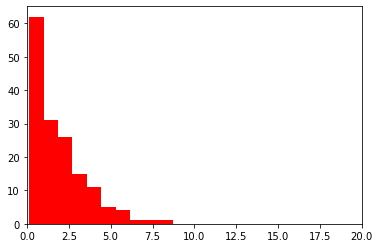

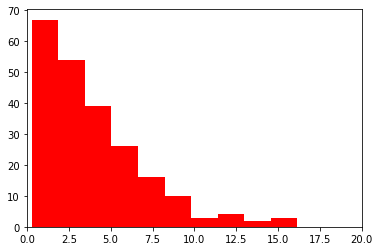

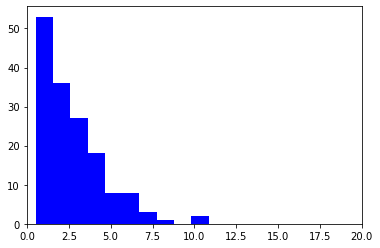

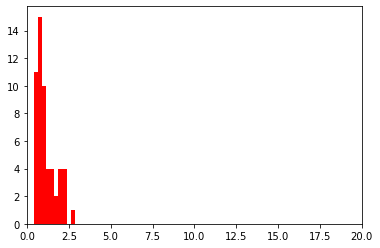

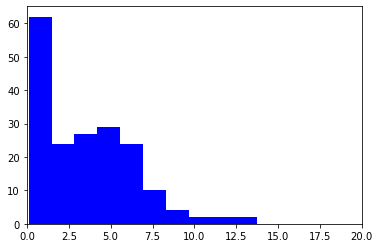

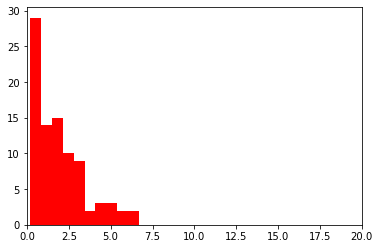

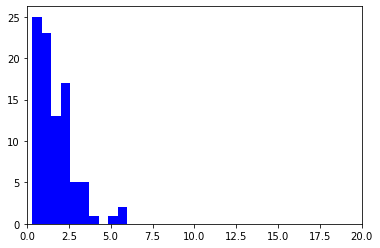

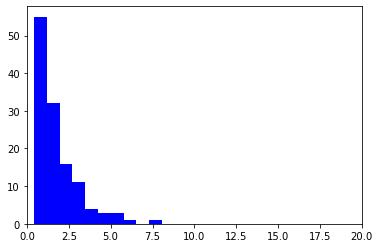

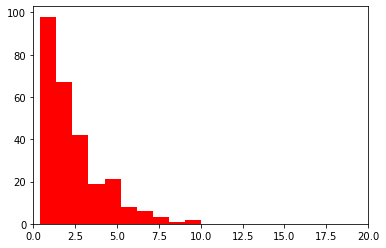

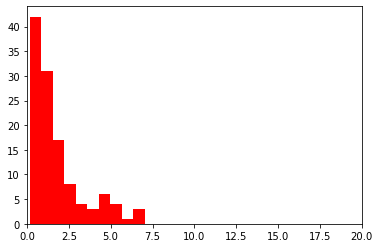

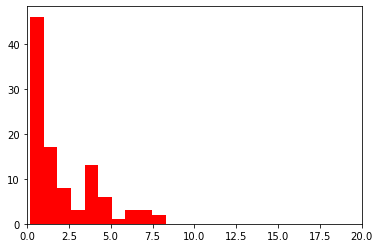

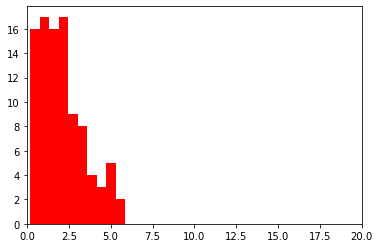

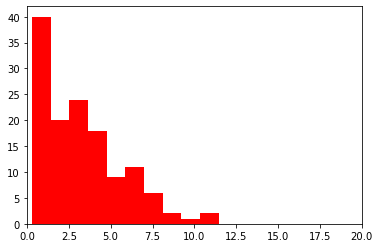

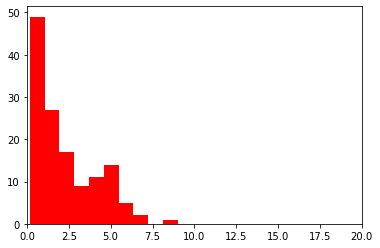

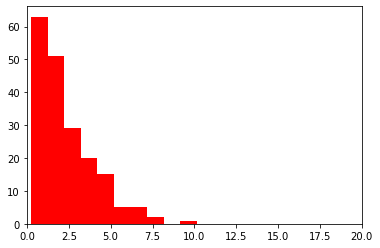

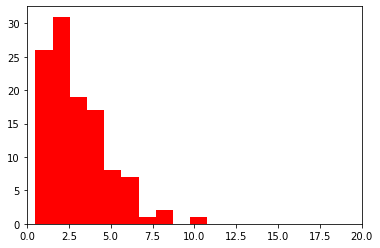

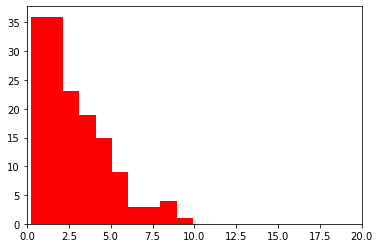

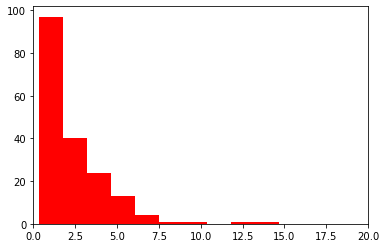

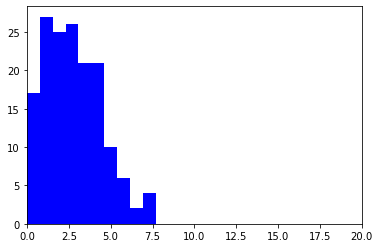

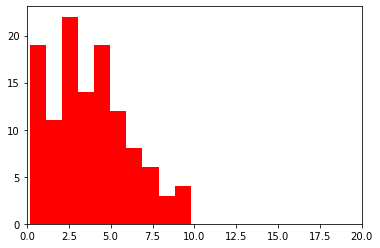

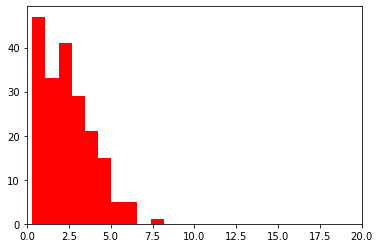

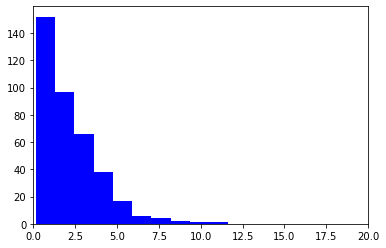

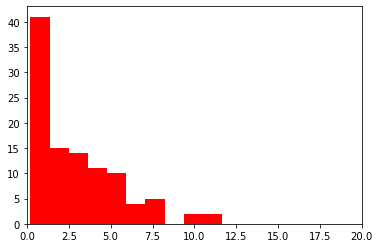

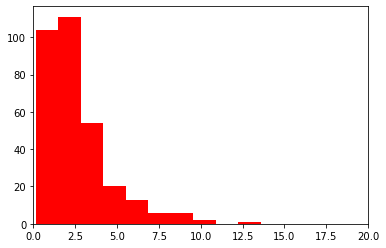

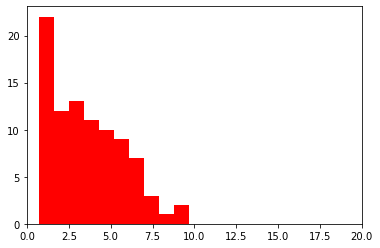

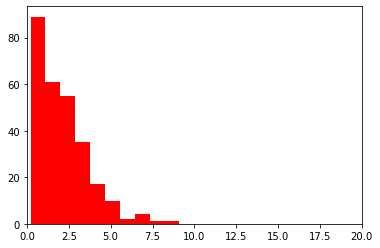

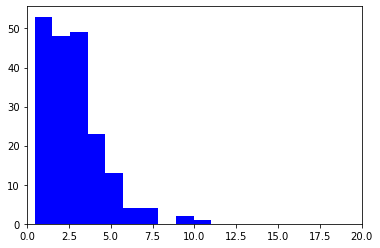

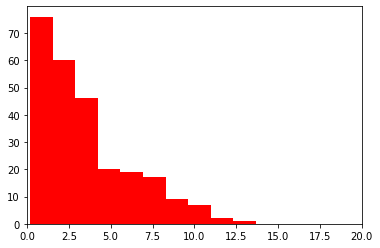

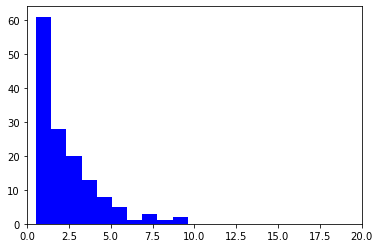

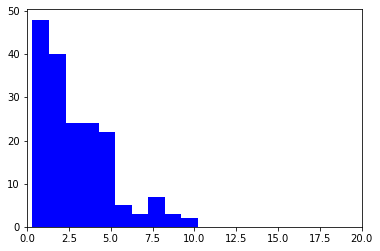

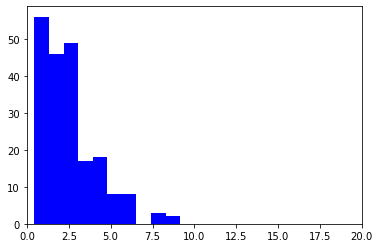

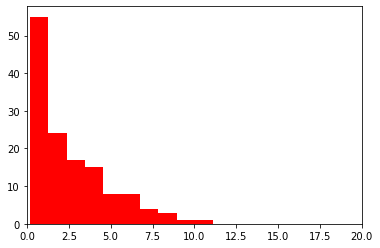

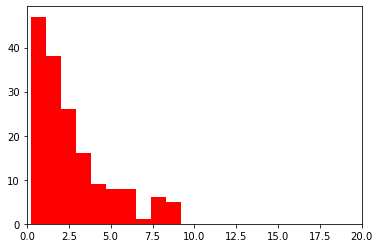

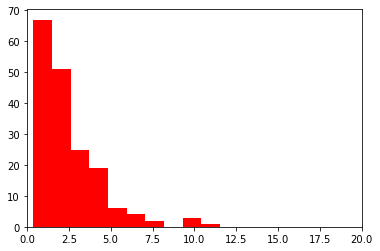

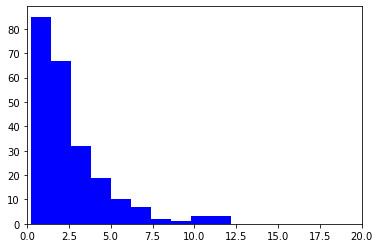

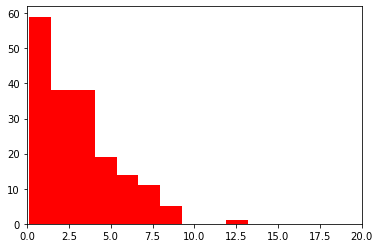

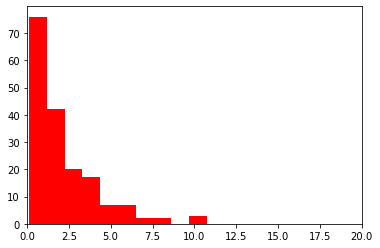

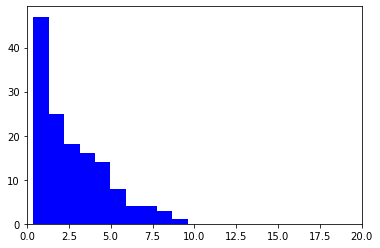

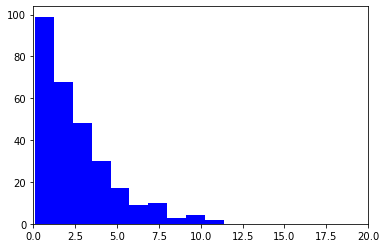

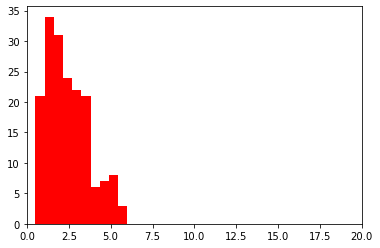

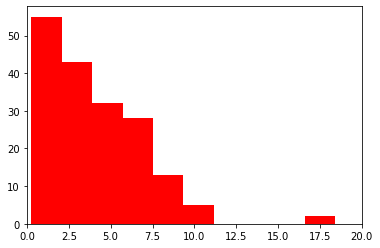

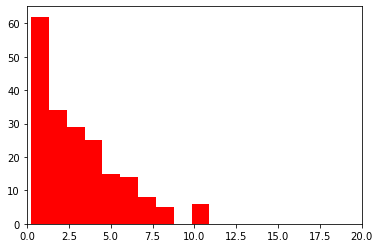

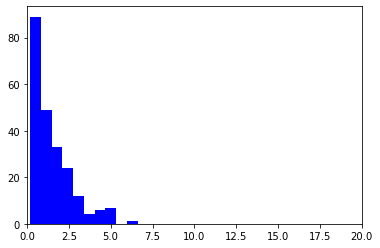

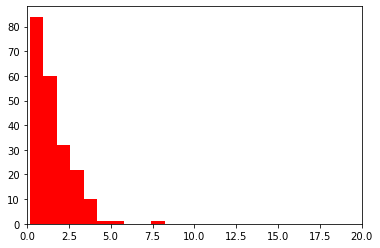

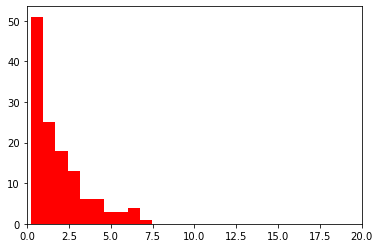

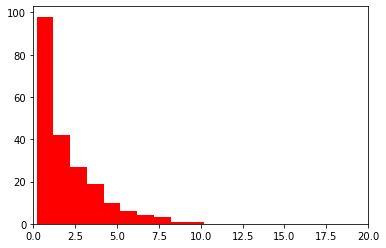

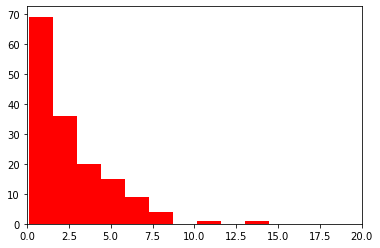

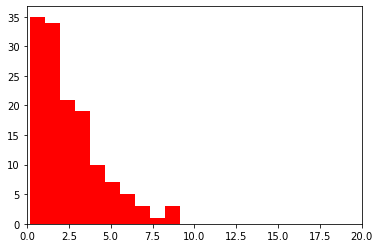

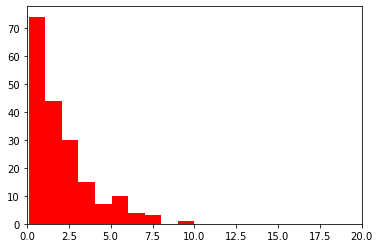

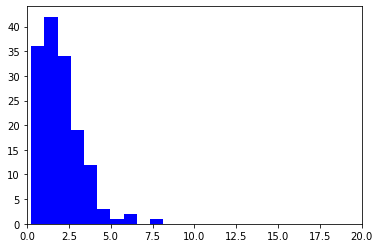

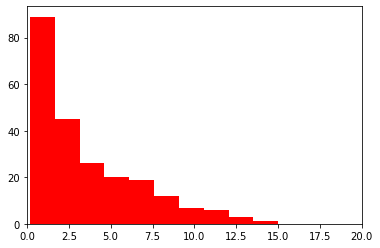

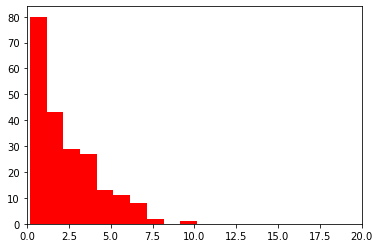

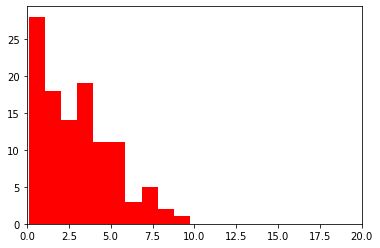

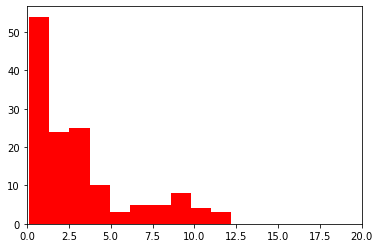

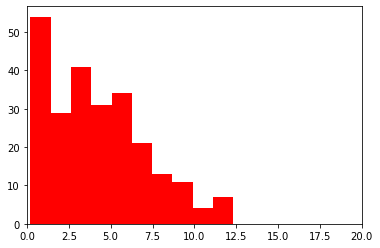

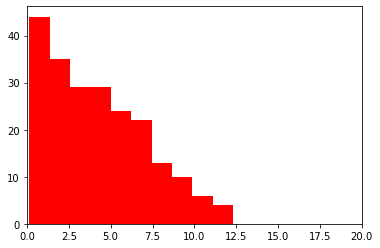

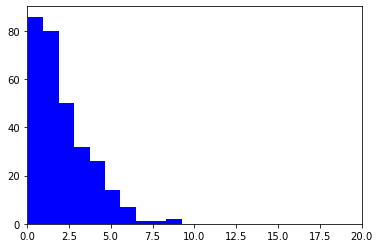

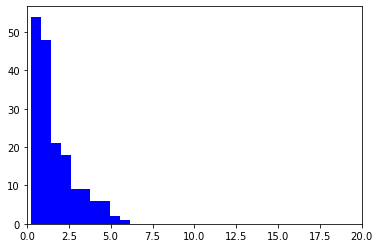

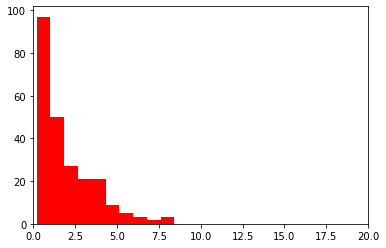

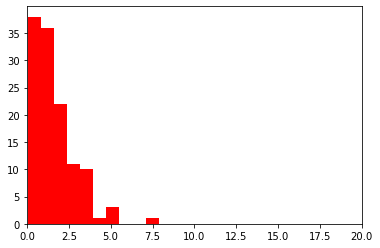

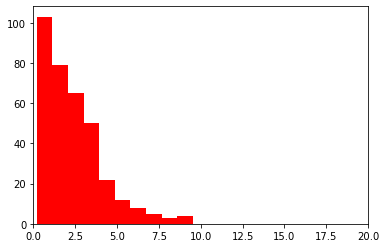

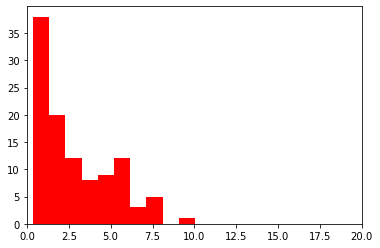

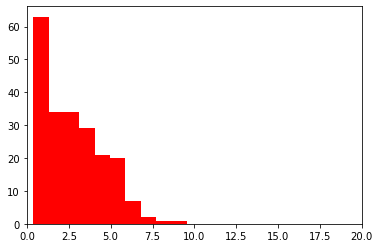

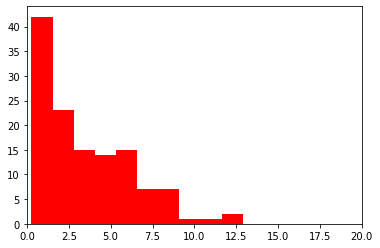

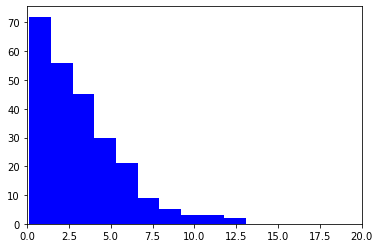

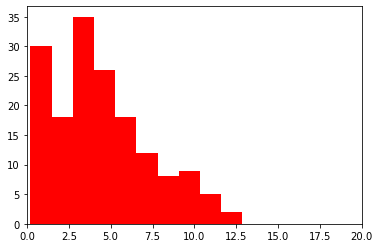

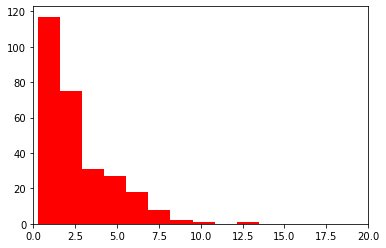

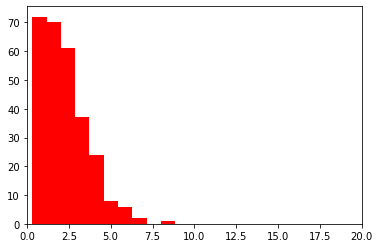

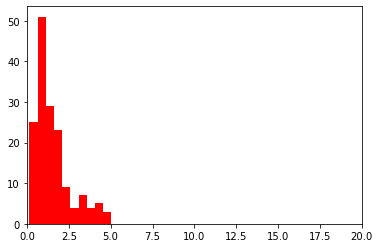

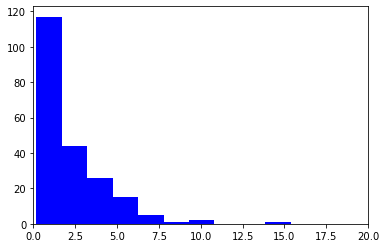

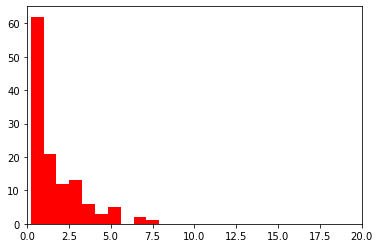

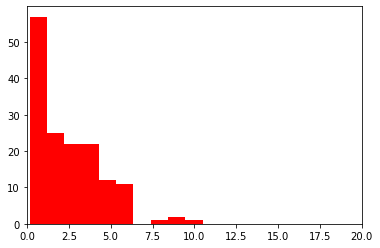

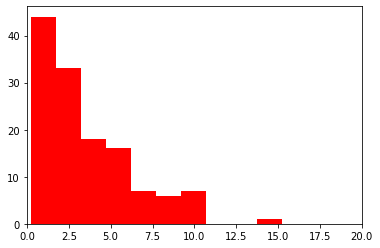

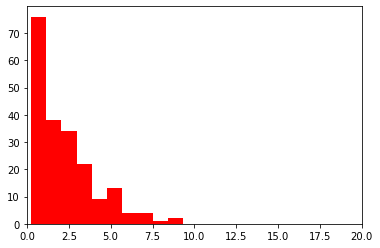

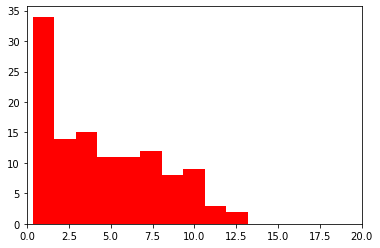

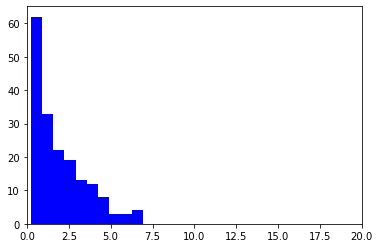

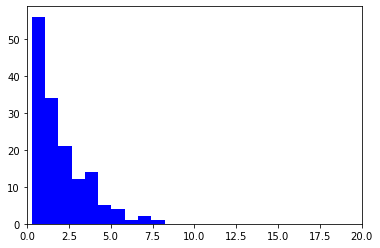

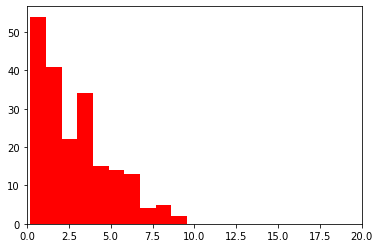

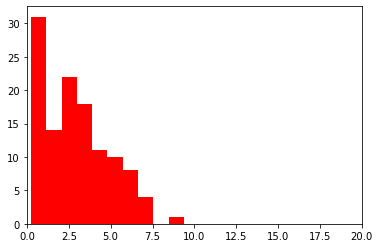

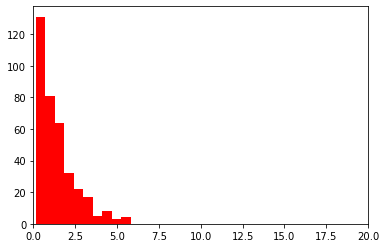

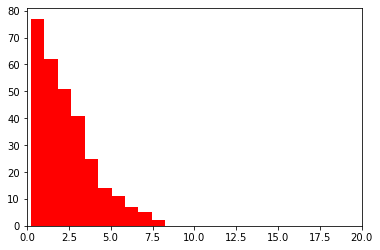

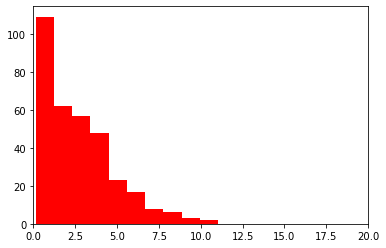

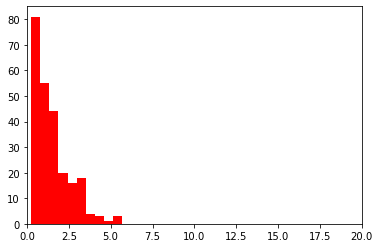

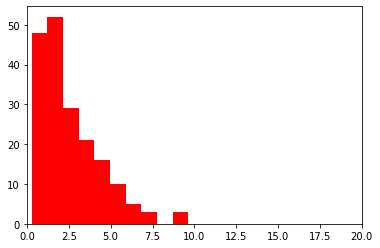

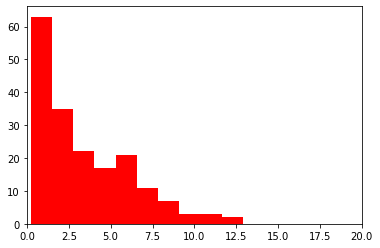

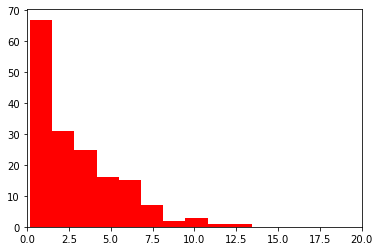

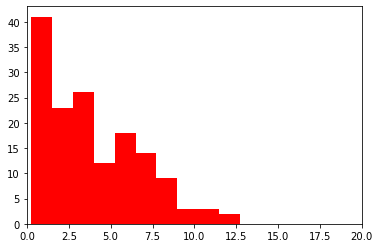

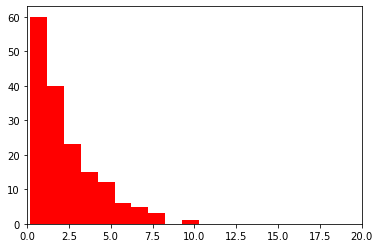

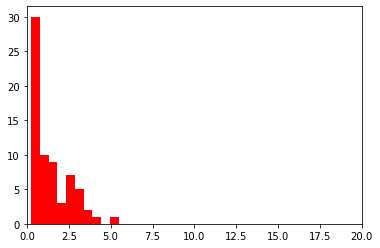

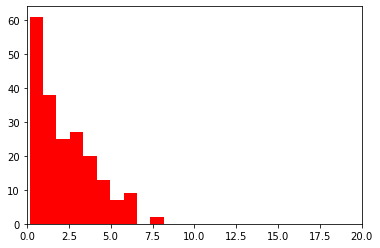

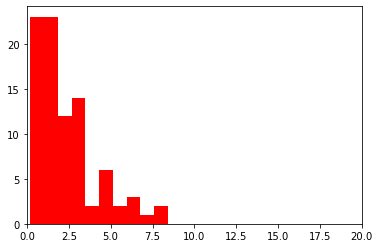

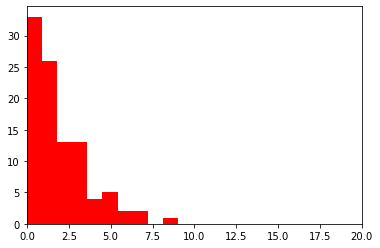

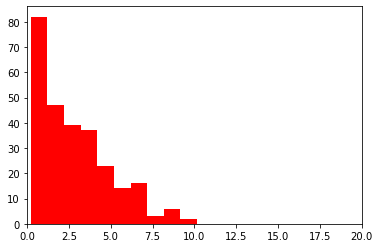

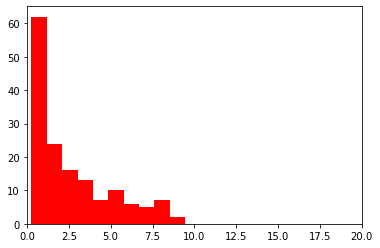

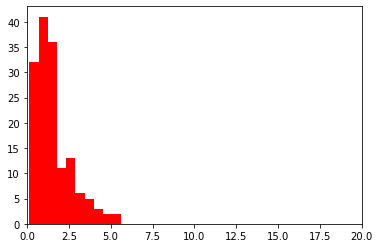

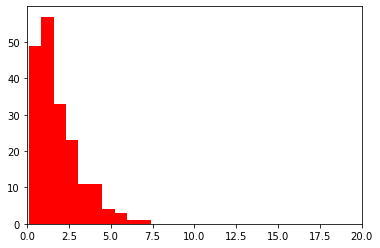

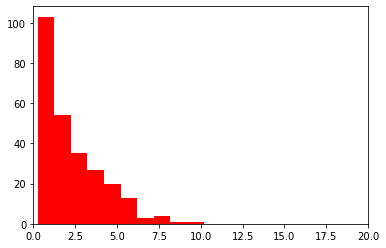

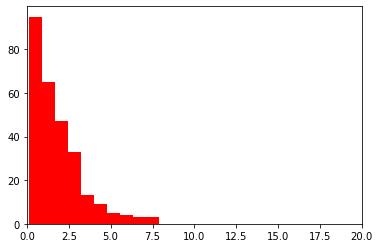

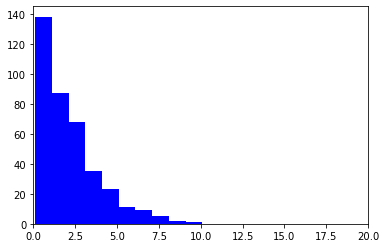

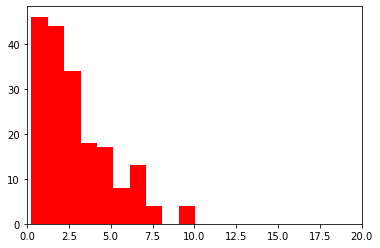

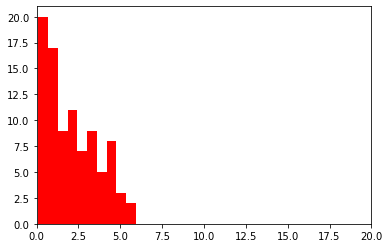

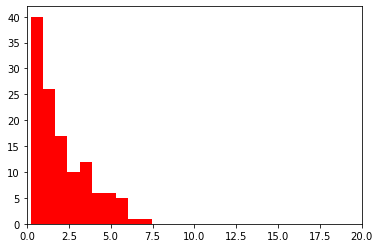

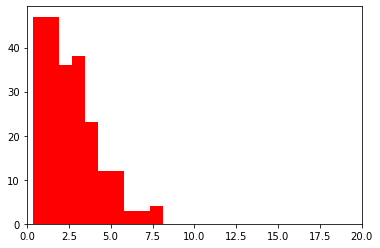

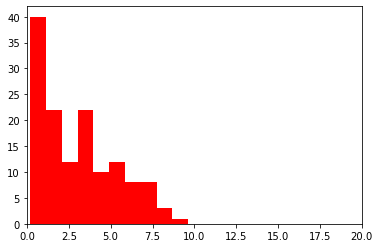

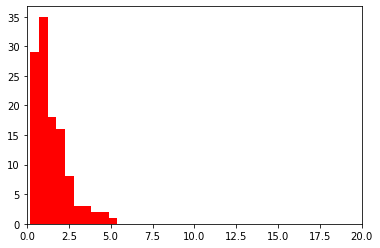

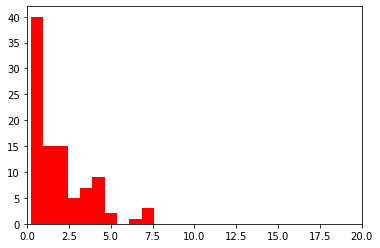

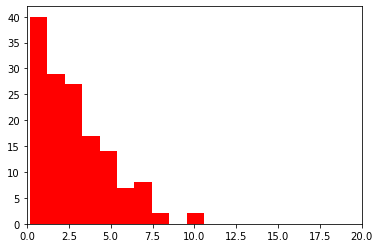

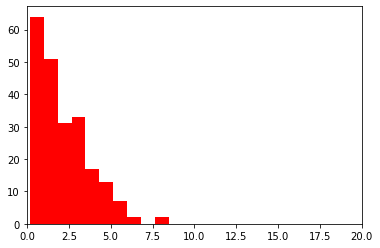

In [42]:
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_colwidth', 500)
for file in files:
    data = pd.read_csv('./data/text/'+file)
    data['interval_time'] = data.stop_time-data.start_time
    ID = int(file[:3])
    is_depress = people[people.Participant_ID==ID].PHQ8_Binary.values
    if is_depress:
        plt.hist(data.interval_time[data.speaker=='Participant'],color='blue')
        plt.xlim(0,20)
        plt.savefig('./data/duration/'+str(is_depress)+"_"+file+'.png')
    else:
        plt.hist(data.interval_time[data.speaker=='Participant'],color='red')
        plt.xlim(0,20)
        plt.savefig('./data/duration/'+str(is_depress)+"_"+file+'.png')
    plt.show()


# 文本数据处理

In [7]:
train_data = pd.read_csv(data_dir+'train_split_Depression_AVEC2017.csv')
dev_data = pd.read_csv(data_dir+'dev_split_Depression_AVEC2017.csv')
test_data = pd.read_csv(data_dir+'full_test_split.csv')

In [8]:
test_data.rename(columns = {"PHQ_Binary":"PHQ8_Binary"},inplace=True)

In [9]:
print(train_data.columns,end='\n')
print(dev_data.columns,end='\n')
print(test_data.columns,end='\n')
labels = pd.concat([train_data[['Participant_ID','PHQ8_Binary']],dev_data[['Participant_ID','PHQ8_Binary']],\
           test_data[['Participant_ID','PHQ8_Binary']]],axis=0)
labels.sort_values(by="Participant_ID")
labels.head()

Index(['Participant_ID', 'PHQ8_Binary', 'PHQ8_Score', 'Gender',
       'PHQ8_NoInterest', 'PHQ8_Depressed', 'PHQ8_Sleep', 'PHQ8_Tired',
       'PHQ8_Appetite', 'PHQ8_Failure', 'PHQ8_Concentrating', 'PHQ8_Moving'],
      dtype='object')
Index(['Participant_ID', 'PHQ8_Binary', 'PHQ8_Score', 'Gender',
       'PHQ8_NoInterest', 'PHQ8_Depressed', 'PHQ8_Sleep', 'PHQ8_Tired',
       'PHQ8_Appetite', 'PHQ8_Failure', 'PHQ8_Concentrating', 'PHQ8_Moving'],
      dtype='object')
Index(['Participant_ID', 'PHQ8_Binary', 'PHQ_Score', 'Gender'], dtype='object')


,Participant_ID,PHQ8_Binary
0,303,0
1,304,0
2,305,0
3,310,0
4,312,0


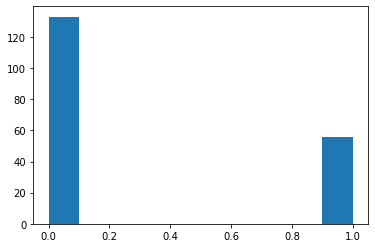

In [10]:
plt.hist(labels['PHQ8_Binary'])
plt.show()

In [11]:
text_files = [file for file in os.listdir(text_dir) if file.endswith('.csv')]
text_files[:5]
assert len(text_files)==189

In [12]:
text_files.sort()
PREFIX = [file[:3] for file in text_files]
text_files[:5]

['300_TRANSCRIPT.csv',
 '301_TRANSCRIPT.csv',
 '302_TRANSCRIPT.csv',
 '303_TRANSCRIPT.csv',
 '304_TRANSCRIPT.csv']

In [13]:
text_300 = pd.read_csv(text_dir+text_files[0],sep='\t')
text_300.head()

,start_time,stop_time,speaker,value
0,36.588,39.668,Ellie,hi i'm ellie thanks for coming in today
1,39.888,43.378,Ellie,i was created to talk to people in a safe and ...
2,43.728,48.498,Ellie,think of me as a friend i don't judge i can't ...
3,49.188,52.388,Ellie,i'm here to learn about people and would love ...
4,52.658,58.958,Ellie,i'll ask a few questions to get us started and...


In [14]:
". ".join(text_300[text_300['speaker']=="Participant"].value.tolist())

"good. atlanta georgia. um my parents are from here um. i love it. i like the weather. i like the opportunities. um. yes. um. it took a minute. somewhat easy. congestion. that's it. um i took up business and administration. uh yeah i am. here and there i'm on a break right now but i plan on going back in the uh next semester. uh probably to open up my own business. no. um no specific reason i just. don't travel a lot. i'm pretty local. once a year. can you be a little bit more specific. no answer. i like reading books i enjoy i enjoy cooking. um exercising is great. i'm i'm i'm pretty good at it. um. yeah. um probably about. two weeks ago. uh frustrated. um. i don't like bias. um i don't like um when someone says they're gonna do something and they don't. uh somewhat. friendship. i like to play sports i enjoy uh going out with friends and family. playing games. grandparents. parents. um yeah i mean they've always given me great advice. they've always kept it real. real close. i would s

In [15]:
with open(text_dir+'docs.txt','w') as f:
    for file in text_files:
        text = pd.read_csv(text_dir+file,sep='\t')
        if np.any(text.value.isnull()):
            text.value.fillna("",inplace=True)
        try:
            text = ". ".join(text[text['speaker']=="Participant"].value.tolist())
            f.write(text)
            f.write('\n')
        except:
            print(file)

In [4]:
with open(TEXT_DIR+"docs.txt",'r') as f:
    docs = "".join(f.readlines()).split('\n')
    docs = docs[:-1]
assert len(docs)==189

In [17]:
with open(text_dir+"labels.txt",'w') as f:
    for label in labels.PHQ8_Binary.tolist():
        f.write(str(label))
        f.write('\n')


In [5]:
with open(TEXT_DIR+"labels.txt",'r') as f:
    labels = "".join(f.readlines()).split('\n')
    labels = labels[:-1]
assert len(labels)==189

In [86]:
def Process_text(text):
    """预处理文本:
    - 分词
    - 去特殊符号
    """
    pattern = r"[!\"#$%&'()*+,-./:;<=>?@\[\]\\^_`{|}~]"
    text = re.sub(pattern,"",text)
    return text

In [87]:
with open(TEXT_DIR+'process_docs.txt','w') as f:
    for doc in docs:
        f.write(Process_text(doc))
        f.write('\n')

In [10]:
import torch
from torch import optim
import torch.nn as nn
import torch.nn.functional as F
from core.model.EmbeddingAverage import EmbedAvg
from collections import Counter
model = EmbedAvg(25000,100,1,0.5)

In [9]:
with open(TEXT_DIR+'process_docs.txt','r') as f:
    docs = "".join(f.readlines()).split('\n')
docs[0]

'good atlanta georgia um my parents are from here um i love it i like the weather i like the opportunities um yes um it took a minute somewhat easy congestion thats it um i took up business and administration uh yeah i am here and there im on a break right now but i plan on going back in the uh next semester uh probably to open up my own business no um no specific reason i just dont travel a lot im pretty local once a year can you be a little bit more specific no answer i like reading books i enjoy i enjoy cooking um exercising is great im im im pretty good at it um yeah um probably about two weeks ago uh frustrated um i dont like bias um i dont like um when someone says theyre gonna do something and they dont uh somewhat friendship i like to play sports i enjoy uh going out with friends and family playing games grandparents parents um yeah i mean theyve always given me great advice theyve always kept it real real close i would say going to college right after high school well i wouldv

In [12]:
words = [sentence.split() for sentence in docs]


In [16]:
allwords = Counter(" ".join(docs).split(' '))
len(allwords)

8611

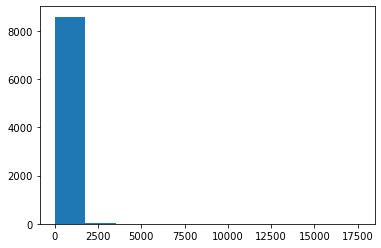

In [38]:
plt.hist(allwords.values())
plt.show()

In [50]:
allwords.most_common(8000)[-10:]

[('pitfalls', 1),
 ('drain', 1),
 ('awakeness', 1),
 ('hoover', 1),
 ('dam', 1),
 ('breathtaking', 1),
 ('stitch', 1),
 ('workload', 1),
 ('vocational', 1),
 ('des', 1)]

In [128]:
from core.model.WordAttention import WordAttention
from core.model.biLSTM_attention import BiLSTM_ATT
import torch.nn as nn
import torch
import torch.optim as optim
import torch.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence, PackedSequence
from torch.utils.data import DataLoader,TensorDataset
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score
import matplotlib.pyplot as plt
from global_values import *

sentences = torch.randint(0,20,(100,10)) # 100*10
labels = torch.randint(0,2,(100,)) #100*1
words_per_sentence = torch.randint(1,11,(100,))

val_sentences = torch.randint(0,20,(200,10))
val_labels = torch.randint(0,2,(200,))
val_words_per_sentence = torch.randint(1,11,(200,))

#model = WordAttention(voc_size=20,emb_size=12,rnn_size=10,rnn_layers=2,att_size=8,bidirection=True,dropout=0.5)
model = BiLSTM_ATT(voc_size=20,emb_size=12,rnn_size=10,rnn_layers=2,att_size=8,bidirection=True,dropout=0.5)
device = "cuda" if torch.cuda.is_available() else "cpu"
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, 0.5)
model.to(device)

BiLSTM_ATT(
  (embedding): Embedding(20, 12)
  (lstm): LSTM(12, 10, num_layers=2, batch_first=True, bidirectional=True)
  (att): Linear(in_features=20, out_features=8, bias=True)
  (word_context_vector): Linear(in_features=8, out_features=1, bias=True)
  (out): Linear(in_features=20, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [137]:
temp_sentences = sentences
temp_labels = labels
temp_words = words_per_sentence

In [129]:
dataset = TensorDataset(sentences,words_per_sentence,labels)
train_data = DataLoader(dataset,batch_size=100,shuffle=True)

val_dataset = TensorDataset(val_sentences,val_words_per_sentence,val_labels)
val_data = DataLoader(val_dataset,batch_size=200,shuffle=True)

In [149]:
def acc_metrics(pre,y,threshold):
    pre = [0 if num<threshold else 1 for num in pre]
    #recall = recall_score(y,pre)
    #precision = precision_score(y,pre)
    #f1 = f1_score(y,pre)
    #accuracy = accuracy_score(y,pre)
    #metrics = [recall,precision,f1,accuracy]
    #return [round(metric,3) for metric in metrics] 
    cnt = 0
    positive = 0
    true_positive = 0
    pre_positive = 0
    for i in range(len(pre)):
        if pre[i]==y[i]:
            cnt+=1
        if y[i]==1:
            positive+=1
        if y[i]==1 and pre[i]==1:
            true_positive+=1
        if pre[i]==1:
            pre_positive+=1
            
    return cnt,len(pre),true_positive,positive,pre_positive

def Train(epoch,train_data,val_data):
    Loss = 0
    cnts = 0
    totals = 0
    true_positives = 0 
    positives = 0
    pre_positives = 0
    for i,(sentences,words_per_sentence,labels) in enumerate(train_data):
        model.train()
        sentences = sentences.to(device)
        words_per_sentence = words_per_sentence.to(device)
        labels = labels.to(device)
        pre = model(sentences,words_per_sentence)
        
        cnt,total,true_positive,positive,pre_positive = acc_metrics(pre.squeeze(),labels.float(),threshold=0.5)
        cnts+=cnt
        totals+= total
        true_positives+=true_positive
        positives+=positive
        pre_positives+=pre_positive
        
        loss = criterion(pre.squeeze(),labels.float())
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), GRAD_CLIP)
        optimizer.step()
        Loss+=loss.item()
        print("Training epoch: {} Loss: {:.5f} ACC: {:.2%} Recall: {:.2%} Precision: {:.2%}".format(epoch,Loss,cnts/totals,\
                                                                                                    true_positives/positives,\
                                                                                                    true_positives/pre_positives))   
        if i%100==0:
            val_loss = Evaluate(model,val_data)
            if len(val_losses)==0 or val_loss<min(val_losses):
                print("best model, Val loss:{:.5f}".format(val_loss))
                torch.save(model.state_dict(),"./result/biLSTM_att-best.th")
            else:
                scheduler.step()
            val_losses.append(val_loss)
            
            
def Evaluate(model,val_data):
    Loss = 0
    cnts = 0
    totals = 0
    true_positives = 0 
    positives = 0
    pre_positives = 0
    model.eval()
    with torch.no_grad():
        for i,(sentences,words_per_sentence,labels) in enumerate(val_data):
            sentences = sentences.to(device)
            words_per_sentence = words_per_sentence.to(device)
            labels = labels.to(device)
            pre = model(sentences,words_per_sentence)

            cnt,total,true_positive,positive,pre_positive = acc_metrics(pre.squeeze(),labels.float(),threshold=0.5)
            cnts+=cnt
            totals+= total
            true_positives+=true_positive
            positives+=positive
            pre_positives+=pre_positive
            loss = criterion(pre.squeeze(),labels.float())
            Loss+=loss.item()
        
        print("Validation epoch: {} Loss: {:.5f} ACC: {:.2%} Recall: {:.2%} Precision: {:.2%}".format(epoch,Loss,cnts/totals,\
                                                                                      true_positives/positives,\
                                                                                        true_positives/pre_positives))
    return Loss

In [150]:
val_losses = []
for epoch in range(100):
    Train(epoch,train_data,val_data)

Training epoch: 0 Loss: 0.00069 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 0 Loss: 5.32340 ACC: 48.00% Recall: 60.64% Precision: 45.97%
best model, Val loss:5.32340
Training epoch: 1 Loss: 0.00042 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 1 Loss: 5.32926 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 2 Loss: 0.00029 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 2 Loss: 5.33066 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 3 Loss: 0.00097 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 3 Loss: 5.33188 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 4 Loss: 0.00042 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 4 Loss: 5.33219 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 5 Loss: 0.00062 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 5 Loss: 5.33233 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 6

Training epoch: 53 Loss: 0.00052 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 53 Loss: 5.33242 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 54 Loss: 0.00047 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 54 Loss: 5.33242 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 55 Loss: 0.00151 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 55 Loss: 5.33242 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 56 Loss: 0.00090 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 56 Loss: 5.33242 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 57 Loss: 0.00092 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 57 Loss: 5.33242 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 58 Loss: 0.00023 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 58 Loss: 5.33242 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 59 Loss: 0.00066 A

In [134]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    initial_lr: 0.01
    lr: 0.01
    weight_decay: 0
)

In [139]:
model.eval()
pre = model(temp_sentences,temp_words).squeeze()
pre = [1 if num>0.5 else 0 for num in pre]


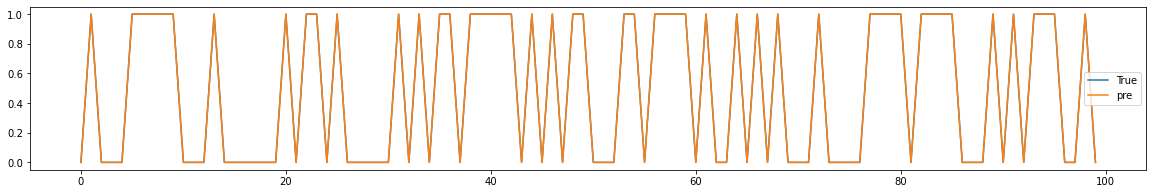

In [141]:
plt.figure(figsize=(20, 3))
plt.plot(range(100),temp_labels,label ="True")
plt.plot(range(100),pre,label ="pre")
plt.legend()
plt.show()

# Face Model

### 现存问题
- aus本身存在重复图片
- labels本身存在重复图片
- labels本身有重复值


In [92]:
aus = pd.read_csv('./face_model/data/aus.csv')
aus.drop(["Unnamed: 0"],axis=1,inplace=True)
aus.head()

,face,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,afraid_African_214,0.975,1.38,1.04,0.00,2.66,0.99,1.30,1.32,0.80,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
1,afraid_African_960,0.975,0.70,1.10,0.00,1.57,0.00,0.65,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,afraid_African_960,0.925,0.61,1.20,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
3,afraid_american_190,0.975,0.51,0.33,0.42,0.00,0.00,0.00,0.00,0.18,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,afraid_american_190,0.875,0.79,0.00,0.00,0.00,1.28,1.27,0.00,1.67,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [93]:
aus.shape

(181909, 37)

In [95]:
aus.drop_duplicates().shape

(181909, 37)

In [96]:
aus.face.drop_duplicates().shape

(78192,)

In [103]:
aus = aus.drop_duplicates(subset=['face'],keep=False)
aus.head()
#aus数据已经不存在重复值

,face,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,afraid_African_214,0.975,1.38,1.04,0.00,2.66,0.99,1.30,1.32,0.80,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
5,afraid_american_238,0.975,1.97,2.07,0.00,1.55,1.16,0.54,0.04,2.12,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
14,afraid_asian_103,0.875,2.60,2.50,0.26,0.87,0.26,1.27,0.00,0.84,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
15,afraid_asian_153,0.875,1.00,2.88,0.00,2.40,0.00,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
16,afraid_asian_2,0.975,1.79,0.46,1.26,0.00,1.95,1.40,0.94,1.58,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0


In [118]:
aus.shape

(42202, 37)

In [114]:
aus.face = [face+'.jpg' for face in aus.face]

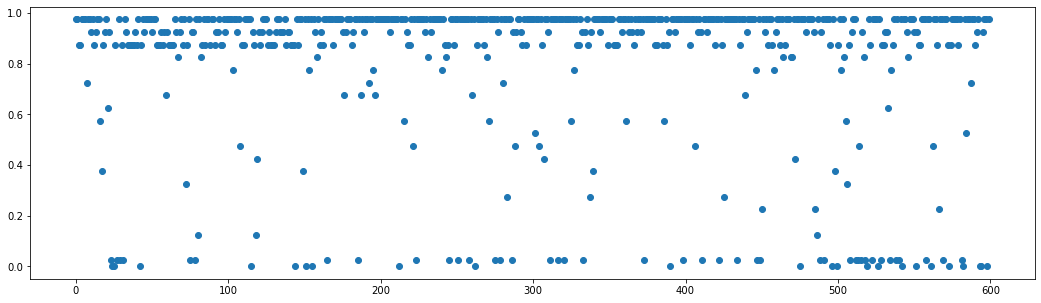

In [106]:
plt.figure(figsize=(18,5))
plt.scatter(range(aus.shape[0])[:600],aus[" confidence"][:600])
plt.show()

In [107]:
with open("./face_model/data/label.lst") as f:
    labels ="".join(f.readlines()).split('\n')
labels = [label.split(' ') for label in labels]
cols = ["face",'face_id_in_image','top','left','right','bottom','confidence','label']
labels = pd.DataFrame(labels,columns=cols)

In [108]:
labels.confidence = labels.confidence.astype('float')
labels.head()

,face,face_id_in_image,top,left,right,bottom,confidence,label
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0


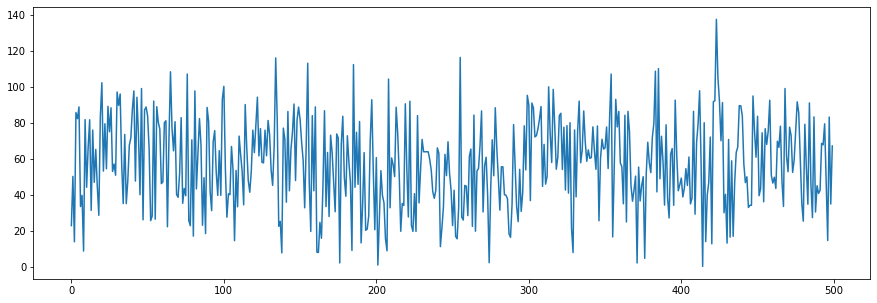

In [109]:
plt.figure(figsize=(15,5))
plt.plot(range(labels.shape[0])[:500],labels["confidence"][:500])
plt.show()

In [112]:
labels = labels.drop_duplicates(subset=['face'],keep=False)
labels.shape

(55649, 8)

In [124]:
data_used = labels.merge(aus,on='face')
data_used.head()
#data_used.shape

,face,face_id_in_image,top,left,right,bottom,confidence,label,confidence,AU01_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0,0.875,0.00,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0,0.925,1.39,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,angry_actor_13.jpg,0,77,51,362,388,85.8104,3,0.975,0.85,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3,angry_actor_132.jpg,0,95,31,412,476,82.3948,0,0.975,0.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,angry_actor_137.jpg,0,93,468,842,467,88.9519,0,0.975,0.64,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [123]:
data_used.label.value_counts()

6    11236
3     7752
4     4961
5     3870
0     2241
1     1674
2      621
Name: label, dtype: int64

In [130]:
data_used.confidence = data_used.confidence/100
data_used.top = data_used.top.astype('float')
data_used.left = data_used.left.astype('float')
data_used.right = data_used.right.astype('float')
data_used.bottom = data_used.bottom.astype('float')
data_used.label = data_used.label.astype('float')
data_used.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32355 entries, 0 to 32354
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   face              32355 non-null  object 
 1   face_id_in_image  32355 non-null  object 
 2   top               32355 non-null  float64
 3   left              32355 non-null  float64
 4   right             32355 non-null  float64
 5   bottom            32355 non-null  float64
 6   confidence        32355 non-null  float64
 7   label             32355 non-null  float64
 8    confidence       32355 non-null  float64
 9    AU01_r           32355 non-null  float64
 10   AU02_r           32355 non-null  float64
 11   AU04_r           32355 non-null  float64
 12   AU05_r           32355 non-null  float64
 13   AU06_r           32355 non-null  float64
 14   AU07_r           32355 non-null  float64
 15   AU09_r           32355 non-null  float64
 16   AU10_r           32355 non-null  float6

In [132]:
data_used.head()

,face,face_id_in_image,top,left,right,bottom,confidence,label,confidence,AU01_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,angry_actor_104.jpg,0,28.0,113.0,226.0,141.0,0.229362,0.0,0.875,0.00,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,angry_actor_109.jpg,0,31.0,157.0,345.0,219.0,0.503056,0.0,0.925,1.39,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,angry_actor_13.jpg,0,77.0,51.0,362.0,388.0,0.858104,3.0,0.975,0.85,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3,angry_actor_132.jpg,0,95.0,31.0,412.0,476.0,0.823948,0.0,0.975,0.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,angry_actor_137.jpg,0,93.0,468.0,842.0,467.0,0.889519,0.0,0.975,0.64,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


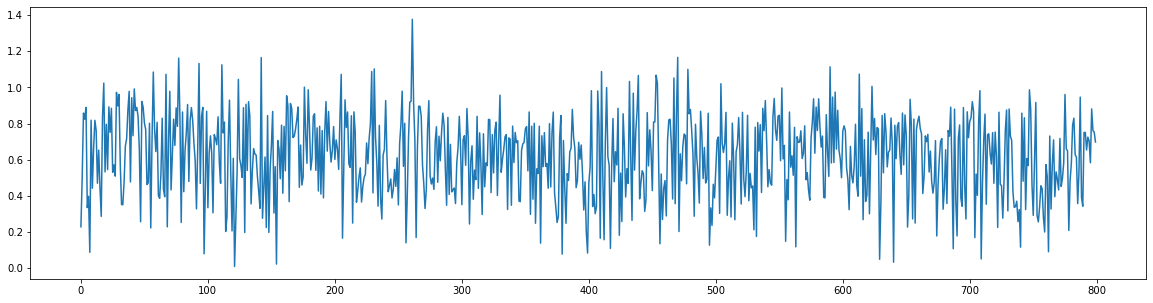

In [136]:
plt.figure(figsize=(20,5))
plt.plot(range(data_used.shape[0])[:800],data_used.confidence[:800])
plt.show()

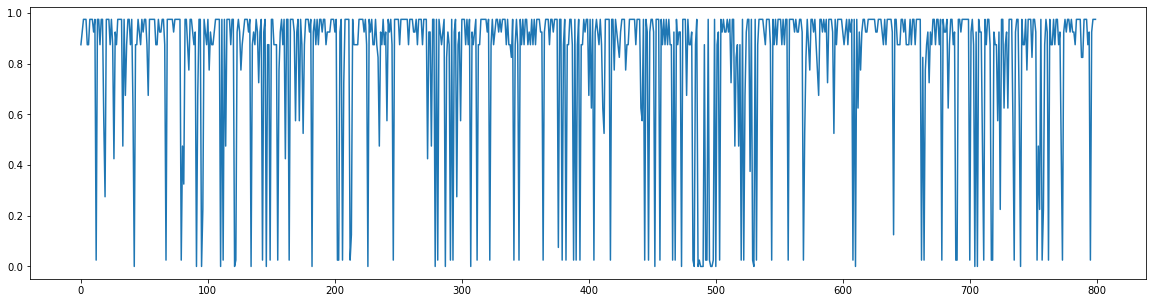

In [137]:
plt.figure(figsize=(20,5))
plt.plot(range(data_used.shape[0])[:800],data_used[' confidence'][:800])
plt.show()

In [143]:
data_used.rename(columns={'confidence':'face_confidence',' confidence':'confidence'},inplace=True)

data_used.head()

,face,face_id_in_image,top,left,right,bottom,confidence,label,confidence,AU01_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,angry_actor_104.jpg,0,28.0,113.0,226.0,141.0,0.229362,0.0,0.875,0.00,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,angry_actor_109.jpg,0,31.0,157.0,345.0,219.0,0.503056,0.0,0.925,1.39,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,angry_actor_13.jpg,0,77.0,51.0,362.0,388.0,0.858104,3.0,0.975,0.85,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3,angry_actor_132.jpg,0,95.0,31.0,412.0,476.0,0.823948,0.0,0.975,0.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,angry_actor_137.jpg,0,93.0,468.0,842.0,467.0,0.889519,0.0,0.975,0.64,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [149]:
data_used.to_csv('./face_model/data/data.csv')

In [20]:
ovr_data = pd.read_csv('./face_model/data/ovr_data.csv')
ovr_data.head()

,face,face_id_in_image,top,left,right,bottom,face_confidence,label,confidence,AU01_r,...,AU26_c,AU28_c,AU45_c,angry,happy,neutral,sad,disgust,surprise,fear
0,angry_actor_104.jpg,0,28,113,226,141,0.229362,0,0.875,0.00,...,0,1,0,1,0,0,0,0,0,0
1,angry_actor_109.jpg,0,31,157,345,219,0.503056,0,0.925,1.39,...,0,0,0,1,0,0,0,0,0,0
2,angry_actor_13.jpg,0,77,51,362,388,0.858104,3,0.975,0.85,...,1,0,1,0,1,0,0,0,0,0
3,angry_actor_132.jpg,0,95,31,412,476,0.823948,0,0.975,0.00,...,0,1,1,1,0,0,0,0,0,0
4,angry_actor_137.jpg,0,93,468,842,467,0.889519,0,0.975,0.64,...,0,0,0,1,0,0,0,0,0,0


In [3]:
ovr_data[ovr_data.confidence>=0.5].describe()

,face_id_in_image,top,left,right,bottom,face_confidence,label,confidence,AU01_r,AU02_r,...,AU26_c,AU28_c,AU45_c,angry,happy,neutral,sad,disgust,surprise,fear
count,25129.000000,25129.000000,25129.000000,25129.000000,25129.000000,25129.000000,25129.000000,25129.000000,25129.000000,25129.000000,...,25129.000000,25129.000000,25129.000000,25129.000000,25129.000000,25129.000000,25129.000000,25129.000000,25129.000000,25129.000000
mean,0.024474,87.942696,217.185483,416.638227,287.395440,0.599627,4.009829,0.914212,0.810544,0.457820,...,0.406065,0.372199,0.228103,0.075451,0.247841,0.320586,0.154483,0.055195,0.125592,0.020852
std,0.188615,105.453115,192.206076,278.946606,211.668973,0.239945,1.855584,0.098107,0.787381,0.742636,...,0.491107,0.483401,0.419618,0.264122,0.431768,0.466711,0.361418,0.228365,0.331396,0.142893
min,0.000000,0.000000,0.000000,47.000000,47.000000,0.000221,0.000000,0.525000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,32.000000,93.000000,238.000000,155.000000,0.427127,3.000000,0.875000,0.030000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,56.000000,168.000000,342.000000,226.000000,0.608512,4.000000,0.975000,0.650000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,107.000000,276.000000,498.000000,341.000000,0.775987,6.000000,0.975000,1.320000,0.690000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2501.000000,2262.000000,2592.000000,2636.000000,1.424130,6.000000,0.975000,4.420000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
from sklearn.model_selection import train_test_split

labels = ovr_data.label
data = ovr_data.drop(['label'],axis=1)

In [22]:
X_train,X_test, y_train, y_test = train_test_split(data,labels,test_size=0.3,stratify = labels)

In [6]:
print(X_train.shape,X_test.shape)

(22648, 50) (9707, 50)


In [7]:
y_train.value_counts()/sum(y_train.value_counts())

6    0.347271
3    0.239580
4    0.153303
5    0.119613
0    0.069278
1    0.051748
2    0.019207
Name: label, dtype: float64

In [23]:
alpha = (sum(y_train.value_counts())/y_train.value_counts())/sum(sum(y_train.value_counts())/y_train.value_counts())
alpha = alpha.sort_index().values
alpha

array([0.13395184, 0.17932631, 0.48315041, 0.03873395, 0.06053296,
       0.07758229, 0.02672224])

In [28]:
y_test.value_counts()/sum(y_test.value_counts())

6    0.347275
3    0.239621
4    0.153394
5    0.119604
0    0.069228
1    0.051715
2    0.019161
Name: label, dtype: float64

In [23]:
y_train.value_counts()

6    7865
3    5426
4    3472
5    2709
0    1569
1    1172
2     435
Name: label, dtype: int64

In [10]:
X_train.head()

,face,face_id_in_image,top,left,right,bottom,face_confidence,confidence,AU01_r,AU02_r,...,AU26_c,AU28_c,AU45_c,angry,happy,neutral,sad,disgust,surprise,fear
31350,amazed_american_328.jpg,0,18,103,216,131,0.395244,0.975,1.95,0.00,...,0,0,0,0,0,0,0,0,1,0
7396,frightened_by_the_movie_girl_79.jpg,0,270,324,648,594,0.767839,0.925,0.98,2.20,...,1,0,0,0,0,0,0,0,1,0
25156,awe_wife_252.jpg,0,56,272,368,152,0.508297,0.475,0.54,0.06,...,0,1,0,0,1,0,0,0,0,0
27632,astound_yang_931.jpg,0,104,570,684,218,0.457742,0.725,1.51,0.57,...,0,0,0,0,0,1,0,0,0,0
440,angry_chinese_114.jpg,0,53,120,177,110,0.383850,0.975,2.14,1.91,...,0,1,0,1,0,0,0,0,0,0


In [10]:
train_data = pd.concat([X_train,y_train],axis=1)
counts = sum(train_data.label ==6)
int(counts/6)

1310

In [13]:
train_data[train_data.confidence>=0.5].groupby('label').mean()[important_aus_c]

NameError: name 'important_aus_c' is not defined

In [80]:
important_aus_r = [" AU"+str(i)+"_r" if i>=10 else " AU0"+str(i)+"_r" for i in sorted([12,25,4,7,15,1,20,2,26,9,10,17])]
important_aus_c = [" AU"+str(i)+"_c" if i>=10 else " AU0"+str(i)+"_c" for i in sorted([12,25,4,7,15,1,20,2,26,9,10,17])]

train_data[train_data.confidence>=0.5].groupby('label').mean()[important_aus_r]

,AU01_r,AU02_r,AU04_r,AU07_r,AU09_r,AU10_r,AU12_r,AU15_r,AU17_r,AU20_r,AU25_r,AU26_r
label,,,,,,,,,,,,
0,0.637708,0.380335,1.029832,1.569703,1.296596,1.282391,0.520015,0.482833,0.441081,0.470518,1.214791,0.475659
1,0.791905,0.400259,0.781625,0.778954,0.476335,0.701988,0.389286,0.499079,0.515631,0.461056,0.488903,0.446449
2,1.109836,0.874110,0.665288,0.860027,0.573973,0.940795,0.582877,0.524822,0.468712,0.529425,1.171397,0.736575
3,0.581630,0.273783,0.355899,1.147501,0.456421,1.165743,1.558858,0.205757,0.236041,0.427331,1.157779,0.429207
4,0.918678,0.363686,0.861531,1.170639,0.619853,0.856487,0.530430,0.512015,0.469960,0.720477,0.735312,0.561131
5,1.165506,1.046572,0.385966,0.596522,0.308473,0.637981,0.511664,0.424006,0.330032,0.408250,1.081345,0.805811
6,0.805183,0.402463,0.518722,0.596557,0.302734,0.492913,0.309988,0.448984,0.446578,0.453152,0.266987,0.442571


In [75]:
train_data.groupby('label').mean()[important_aus]

,AU01_r,AU02_r,AU04_r,AU07_r,AU09_r,AU10_r,AU12_r,AU15_r,AU17_r,AU20_r,AU25_r,AU26_r
label,,,,,,,,,,,,
0,0.756507,0.409095,0.948388,1.492243,1.129745,1.199433,0.588375,0.469700,0.492014,0.471791,1.082945,0.456762
1,0.866041,0.393157,0.733276,0.834036,0.434437,0.676544,0.440128,0.483046,0.545034,0.480700,0.448191,0.443370
2,1.159540,0.826069,0.639678,0.856483,0.521195,0.898046,0.631356,0.506805,0.526828,0.539218,1.040322,0.709287
3,0.664156,0.284012,0.369458,1.098638,0.416758,1.044965,1.420549,0.233257,0.302724,0.458461,0.996097,0.410713
4,0.995351,0.381020,0.787376,1.119297,0.542175,0.808301,0.581967,0.499061,0.544868,0.700161,0.644450,0.533505
5,1.207494,0.959790,0.405504,0.664500,0.287394,0.640162,0.580786,0.418114,0.406955,0.452300,0.940783,0.726755
6,0.915102,0.401278,0.499162,0.658957,0.271134,0.498935,0.402636,0.431395,0.534167,0.525914,0.248976,0.426356


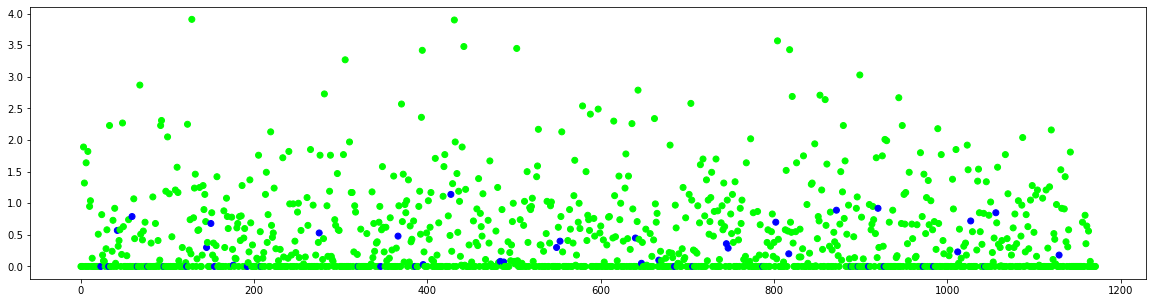

In [69]:
plt.figure(figsize=(20,5))
plt.scatter(range(1172),train_data[train_data.label == 1][" AU09_r"],c=[train_data[train_data.label == 1].confidence>=0.01],cmap='brg')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(train_data[train_data.label==3][" AU12_r"],bins=30)
plt.show()

In [ ]:
traintrain_data[train_data.label==3][" AU25_r"]==0

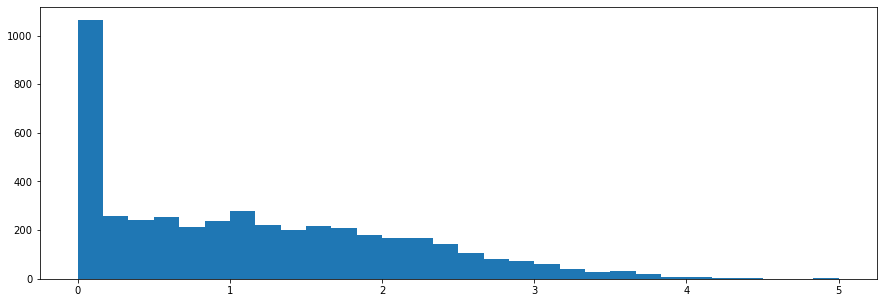

In [70]:
plt.figure(figsize=(15,5))
plt.hist(train_data[train_data.label==3][train_data[train_data.label==3].confidence>0.3][" AU25_r"],bins=30)
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(train_data[train_data.label==3]["confidence"],bins=30)
plt.show()

In [ ]:
plt.figure(figsize=(20,5))
happy_aus = train_data[train_data.label==3][[" AU12_r"," AU25_r"]]
plt.plot(range(happy_aus.shape[0])[:500],happy_aus.iloc[:500,0],label='12')
#plt.plot(range(happy_aus.shape[0])[:500],happy_aus.iloc[:500,1],label='25')
plt.legend()
plt.show()

In [ ]:
from sklearn.utils import shuffle
from face_model.model_config import *
def generate(datasets,i):
    pos_data = train_data[train_data.label==i]
    neg_data = pd.DataFrame(data=None,columns=train_data.columns)
    counts = int(pos_data.shape[0]/6)
    k = 0
    while k<7:
        if k==i:
          pass  
        elif train_data[train_data.label==k].shape[0]<=counts:
            neg_data = pd.concat([neg_data,train_data[train_data.label==k]],axis=0)
        else:
            neg_data = pd.concat([neg_data,train_data[train_data.label==k].sample(counts,replace=False)],axis=0)
        print("class {} has been extracted!".format(k))
        k+=1
    return shuffle(pd.concat([pos_data,neg_data],axis=0))


In [ ]:
train_class6 = generate(train_data,6)

In [ ]:
for i in range(7):
    data = generate(train_data,i)
    data.to_csv("./face_model/data/"+EXPRESSION_LABEL[str(i)]+"_ovr_data.csv",index= False)

In [11]:
test_data = pd.concat([X_test,y_test],axis=1)
#test_data.to_csv('./face_model/data/ovr_test_data.csv',index=None)

### 构建数据集和搭建模型

In [24]:
from torch.utils.data import TensorDataset,DataLoader

X_train,y_train = torch.Tensor(train_data[FEATURE_COLUMNS].values),torch.Tensor(train_data['label'].values)
X_test,y_test   = torch.Tensor(test_data[FEATURE_COLUMNS].values),torch.Tensor(test_data['label'].values)
train_set = TensorDataset(X_train,y_train)
test_set  = TensorDataset(X_test,y_test)
train_loader = DataLoader(train_set,batch_size=5096,shuffle=True)
test_loader  = DataLoader(test_set,batch_size=5096,shuffle=True)

In [25]:
writer = SummaryWriter('./face_model/results/log')
model1 = NN(36,(16,32,16),7,0.5)
model2 = ResidualNN(18,[(16,32,16,0.4),(16,64,16,0.4),(16,32,16,0.4)],7)
device = "cuda" if torch.cuda.is_available() else "cpu"
#criterion = nn.NLddLLoss()
criterion = FocalLoss_MultiLabel(7,alpha,2)
optimizer = optim.Adam(model1.parameters(),lr=0.1)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, 0.98)
model1.to(device)
#model2.to(device)

NN(
  (fc): Linear(in_features=36, out_features=16, bias=True)
  (h1): Linear(in_features=16, out_features=32, bias=True)
  (h2): Linear(in_features=32, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=7, bias=True)
  (bn1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

### 训练+验证

In [28]:
test_losses = []
for epoch in range(100):
    losses = 0
    for index,(x,y) in enumerate(train_loader):
        model1.train()
        x = x.to(device)
        y = y.to(device)
        pre = model1(x)
        loss = criterion(pre,y.long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses+=loss.item()
    writer.add_scalar("focal_bn_plain_loss/train", losses , global_step=epoch, walltime=None)
    print("epoch {} training loss {:.4f}".format(epoch,losses),end=' ')
    test_loss=0
    results = {label:np.array([0,0,0]) for label in EXPRESSION_LABEL.values()}
    for x_test,y_test in test_loader:
        model1.eval()
        x_test = x_test.to(device)
        y_test = y_test.to(device)
        pre = model1(x_test)
        result = P_R(pre,y_test)
        results = {label:results[label]+result[label] for label,value in results.items()}
        loss = criterion(pre,y_test.long())
        test_loss+=loss.item()
    writer.add_scalar("focal_bn_plain_loss/test", test_loss , global_step=epoch, walltime=None)
    print("testing loss {:.4f}".format(test_loss))
    results_precison = {label:round(value[0]/(value[1]+value[0]),3) for label,value in results.items()}
    results_recall   = {label:round(value[0]/(value[2]+value[0]),3) for label,value in results.items()}
    #print("precision:",results_precison['sad'],end=' ')
    #print("recall:", results_recall['sad'])
    if test_losses and test_loss>min(test_losses):
        scheduler.step()
    test_losses.append(test_loss)
print("precision:")
print(results_precison)
print("recall:")
print(results_recall)

epoch 0 training loss 0.3014 

NameError: name 'EXPRESSION_LABEL' is not defined

In [27]:
from face_model.common import P_R

In [116]:
RAF_data= pd.read_csv('./face_model/data/RAF_data.csv')
#RAF_data.label = RAF_data.label-1
#RAF_data.to_csv('./face_model/data/RAF_data.csv')
RAF_data.head()

,Unnamed: 0,face,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,imgID,label
0,0,0,0.925,2.35,0.0,0.0,0.45,0.91,0.00,0.35,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,test_0001.jpg,4
1,1,0,0.975,1.39,0.0,0.0,0.25,0.00,0.10,0.00,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,test_0002.jpg,0
2,2,0,0.825,0.00,0.0,0.0,0.00,0.46,1.04,1.31,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,test_0004.jpg,0
3,3,0,0.875,0.00,0.0,0.0,0.00,0.44,0.00,0.00,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,test_0006.jpg,4
4,4,0,0.975,0.00,0.0,0.0,0.02,0.52,0.47,1.91,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,test_0007.jpg,2


In [117]:
test_RAF_data = RAF_data[[True if "test" in img else False for img in RAF_data.imgID]]
test_RAF_data.label.value_counts()
#test_RAF_data.to_csv('./face_model/data/test_RAF_data.csv')

3    935
6    568
4    342
0    271
2    140
5    131
1     58
Name: label, dtype: int64

In [118]:
train_RAF_data = RAF_data[[False if "test" in img else True for img in RAF_data.imgID]]
train_RAF_data.label.value_counts()
#train_RAF_data.to_csv('./face_model/data/train_RAF_data.csv')

3    3748
6    2089
4    1494
0    1065
2     615
5     546
1     212
Name: label, dtype: int64

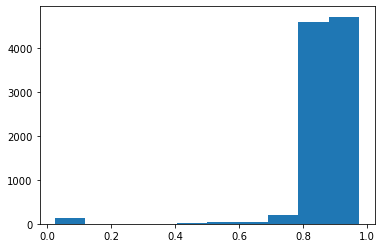

In [119]:
plt.hist(train_RAF_data[' confidence'])
plt.show()

In [120]:
train_RAF_data.groupby('label')[' confidence'].mean()

label
0    0.885282
1    0.859906
2    0.884675
3    0.894023
4    0.901305
5    0.866026
6    0.910112
Name:  confidence, dtype: float64

In [121]:
train_RAF_data.label.value_counts().sort_index()

0    1065
1     212
2     615
3    3748
4    1494
5     546
6    2089
Name: label, dtype: int64

In [2]:
EXPRESSION_LABEL

{'0': 'Surprise',
 '1': 'Fear',
 '2': 'Disgust',
 '3': 'Happiness',
 '4': 'Sadness',
 '5': 'Anger',
 '6': 'Neutral'}

In [122]:
data = pd.read_csv('./face_model/data/data.csv')
data.head()

,face,face_id_in_image,top,left,right,bottom,face_confidence,label,confidence,AU01_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,angry_actor_104.jpg,0,28,113,226,141,0.229362,0,0.875,0.00,...,0,1,1,1,1,0,1,0,1,0
1,angry_actor_109.jpg,0,31,157,345,219,0.503056,0,0.925,1.39,...,1,0,1,0,1,0,1,0,0,0
2,angry_actor_13.jpg,0,77,51,362,388,0.858104,3,0.975,0.85,...,0,0,1,1,0,0,1,1,0,1
3,angry_actor_132.jpg,0,95,31,412,476,0.823948,0,0.975,0.00,...,0,0,0,1,0,0,0,0,1,1
4,angry_actor_137.jpg,0,93,468,842,467,0.889519,0,0.975,0.64,...,0,1,1,0,1,0,1,0,0,0


In [123]:
data.groupby('label')['confidence'].mean()

label
0    0.784538
1    0.772625
2    0.783937
3    0.760010
4    0.734993
5    0.757842
6    0.679410
Name: confidence, dtype: float64

In [26]:
data[data.confidence>0.3]

,face,face_id_in_image,top,left,right,bottom,face_confidence,label,confidence,AU01_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,angry_actor_104.jpg,0,28,113,226,141,0.229362,0,0.875,0.00,...,0,1,1,1,1,0,1,0,1,0
1,angry_actor_109.jpg,0,31,157,345,219,0.503056,0,0.925,1.39,...,1,0,1,0,1,0,1,0,0,0
2,angry_actor_13.jpg,0,77,51,362,388,0.858104,3,0.975,0.85,...,0,0,1,1,0,0,1,1,0,1
3,angry_actor_132.jpg,0,95,31,412,476,0.823948,0,0.975,0.00,...,0,0,0,1,0,0,0,0,1,1
4,angry_actor_137.jpg,0,93,468,842,467,0.889519,0,0.975,0.64,...,0,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32349,expressionless_husband_673.jpg,0,48,194,388,242,0.822975,4,0.975,0.89,...,0,1,1,1,1,0,0,1,0,0
32350,surprised_expression_546.jpg,0,70,70,351,351,0.377117,5,0.975,1.39,...,0,0,1,0,0,1,0,1,1,0
32351,surprised_expression_381.jpg,0,51,61,117,107,0.916307,5,0.925,0.68,...,1,1,1,0,0,0,1,0,0,0
32352,surprised_expression_395.jpg,0,27,95,258,190,0.962861,5,0.925,0.98,...,0,0,0,1,0,0,1,1,1,0


In [41]:
data[data.confidence>0.5].label.value_counts()

# 1 0 2

6    8056
3    6228
4    3882
5    3156
0    1896
1    1387
2     524
Name: label, dtype: int64

In [39]:
train_RAF_data.label.value_counts()
# 2 Disgust 5 anger 1 fear

3    3748
6    2089
4    1494
0    1065
2     615
5     546
1     212
Name: label, dtype: int64

In [43]:
train_RAF_data.head()

,Unnamed: 0,face,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,imgID,label
2445,2445,0,0.975,0.00,0.0,0.0,0.00,1.20,0.87,0.34,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train_00001.jpg,4
2446,2446,0,0.875,1.32,0.0,0.0,0.10,0.86,0.99,0.00,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,train_00003.jpg,3
2447,2447,0,0.925,0.00,0.0,0.0,0.00,0.23,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train_00004.jpg,3
2448,2448,0,0.925,0.00,0.0,0.0,0.62,0.00,0.00,0.00,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,train_00006.jpg,0
2449,2449,0,0.975,0.00,0.0,0.0,0.26,0.47,0.09,1.09,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,train_00007.jpg,4


In [124]:
train_RAF_data = train_RAF_data[["imgID","label"]+FEATURE_COLUMNS].reindex()
train_RAF_data.head()

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
2445,train_00001.jpg,4,0.975,0.00,0.0,0.0,0.00,1.20,0.87,0.34,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2446,train_00003.jpg,3,0.875,1.32,0.0,0.0,0.10,0.86,0.99,0.00,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2447,train_00004.jpg,3,0.925,0.00,0.0,0.0,0.00,0.23,0.00,0.00,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2448,train_00006.jpg,0,0.925,0.00,0.0,0.0,0.62,0.00,0.00,0.00,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2449,train_00007.jpg,4,0.975,0.00,0.0,0.0,0.26,0.47,0.09,1.09,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [126]:
data = data.rename(columns = {'confidence':' confidence'})
data = data[["face","label"]+FEATURE_COLUMNS].reindex()

In [127]:
data = data.rename(columns={"face":"imgID"})

In [128]:
data.head()

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,angry_actor_104.jpg,0,0.875,0.00,0.0,1.69,0.39,1.45,2.04,0.78,...,0,1,1,1,1,0,1,0,1,0
1,angry_actor_109.jpg,0,0.925,1.39,0.0,1.31,0.38,0.91,0.75,1.21,...,1,0,1,0,1,0,1,0,0,0
2,angry_actor_13.jpg,3,0.975,0.85,0.0,0.59,0.08,0.06,0.69,0.27,...,0,0,1,1,0,0,1,1,0,1
3,angry_actor_132.jpg,0,0.975,0.00,0.0,1.64,0.93,0.00,0.00,0.10,...,0,0,0,1,0,0,0,0,1,1
4,angry_actor_137.jpg,0,0.975,0.64,0.0,1.63,0.39,1.28,1.08,2.44,...,0,1,1,0,1,0,1,0,0,0


In [129]:
train_RAF_data.head()

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
2445,train_00001.jpg,4,0.975,0.00,0.0,0.0,0.00,1.20,0.87,0.34,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2446,train_00003.jpg,3,0.875,1.32,0.0,0.0,0.10,0.86,0.99,0.00,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2447,train_00004.jpg,3,0.925,0.00,0.0,0.0,0.00,0.23,0.00,0.00,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2448,train_00006.jpg,0,0.925,0.00,0.0,0.0,0.62,0.00,0.00,0.00,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2449,train_00007.jpg,4,0.975,0.00,0.0,0.0,0.26,0.47,0.09,1.09,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [135]:
data_angry = data[data.label==0].copy()
data_angry.label = 5
data_angry.head()

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,angry_actor_104.jpg,5,0.875,0.00,0.00,1.69,0.39,1.45,2.04,0.78,...,0,1,1,1,1,0,1,0,1,0
1,angry_actor_109.jpg,5,0.925,1.39,0.00,1.31,0.38,0.91,0.75,1.21,...,1,0,1,0,1,0,1,0,0,0
3,angry_actor_132.jpg,5,0.975,0.00,0.00,1.64,0.93,0.00,0.00,0.10,...,0,0,0,1,0,0,0,0,1,1
4,angry_actor_137.jpg,5,0.975,0.64,0.00,1.63,0.39,1.28,1.08,2.44,...,0,1,1,0,1,0,1,0,0,0
5,angry_actor_139.jpg,5,0.875,2.38,1.27,2.77,1.23,0.24,2.20,0.09,...,0,0,1,1,1,0,1,1,1,1


In [136]:
data_disgust = data[data.label==1].copy()
data_disgust.label = 2
data_disgust.head()

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
14,angry_actor_195.jpg,2,0.975,2.42,0.82,1.34,0.62,0.00,0.07,0.00,...,0,0,1,1,0,1,0,1,1,1
16,angry_actor_198.jpg,2,0.975,0.79,0.20,2.19,0.61,0.00,0.50,0.71,...,0,0,0,1,0,0,0,0,1,0
50,angry_actor_414.jpg,2,0.975,0.00,0.00,1.04,0.21,0.79,0.05,0.32,...,1,0,1,1,0,1,0,0,1,0
60,angry_actor_497.jpg,2,0.875,1.74,0.99,0.00,1.45,2.24,2.60,0.16,...,1,0,0,0,0,0,1,0,0,0
156,angry_american_730.jpg,2,0.775,1.39,0.00,1.50,0.05,0.72,2.82,0.24,...,0,0,1,1,1,1,0,0,1,0


In [137]:
data_fear = data[data.label==2].copy()
data_fear.label = 1
data_fear.head()

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
640,angry_expression_682.jpg,1,0.125,1.80,0.32,0.00,2.31,0.40,0.00,0.00,...,1,0,1,1,0,0,1,0,1,0
765,angry_father_78.jpg,1,0.875,0.00,0.34,0.09,0.92,0.77,0.00,0.18,...,0,1,0,1,1,1,0,0,1,0
1051,angry_lady_384.jpg,1,0.975,0.38,0.00,0.76,1.93,0.00,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0
1995,angry_woman_84.jpg,1,0.875,2.58,0.00,1.32,1.40,1.32,1.42,0.21,...,0,0,1,0,1,1,1,1,0,0
2266,annoyed_boss_260.jpg,1,0.975,0.60,0.00,0.29,0.00,0.55,1.99,0.64,...,0,0,1,0,1,0,0,0,0,1


In [138]:
data_happy = data[data.label==3].copy()
#data_fear.label = 3
data_happy.head()

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
2,angry_actor_13.jpg,3,0.975,0.85,0.0,0.59,0.08,0.06,0.69,0.27,...,0,0,1,1,0,0,1,1,0,1
22,angry_actor_241.jpg,3,0.975,0.00,0.0,0.00,0.00,1.92,0.98,1.51,...,1,1,0,1,1,0,1,0,1,0
24,angry_actor_253.jpg,3,0.975,0.00,0.0,0.07,0.00,0.90,1.02,0.37,...,1,1,0,0,0,0,1,0,0,0
42,angry_actor_366.jpg,3,0.000,0.97,0.0,0.41,1.78,1.26,2.17,1.46,...,1,1,1,0,1,0,1,0,0,0
47,angry_actor_389.jpg,3,0.875,1.38,0.0,0.00,0.49,1.84,3.69,0.35,...,1,0,1,0,1,1,1,0,1,1


In [140]:
data_sad = data[data.label==4].copy()
#data_fear.label = 3
data_sad.head()

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
9,angry_actor_159.jpg,4,0.975,1.15,0.00,0.93,0.38,0.00,0.00,0.04,...,0,1,1,0,0,0,0,0,0,0
18,angry_actor_226.jpg,4,0.575,0.27,0.00,0.44,0.00,2.15,1.29,0.31,...,1,1,1,0,1,1,1,0,0,0
19,angry_actor_227.jpg,4,0.275,2.22,2.54,0.64,3.25,1.76,3.73,0.00,...,0,0,1,0,0,0,0,0,1,0
20,angry_actor_228.jpg,4,0.975,1.67,0.80,2.21,1.00,0.00,0.20,0.42,...,0,0,1,0,1,0,1,0,1,0
35,angry_actor_342.jpg,4,0.675,0.87,0.06,1.10,1.23,0.98,0.00,0.64,...,0,0,0,0,1,0,0,0,0,0


In [141]:
data_surprise = data[data.label==5].copy()
data_surprise.label = 0
data_surprise.head()

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
46,angry_actor_388.jpg,0,0.925,0.00,0.00,0.16,1.20,0.31,0.00,1.07,...,0,0,0,0,0,0,1,1,0,1
57,angry_actor_491.jpg,0,0.975,0.12,0.62,0.68,0.33,0.00,0.00,1.25,...,0,1,0,0,0,0,1,1,0,0
68,angry_actor_530.jpg,0,0.975,1.43,0.00,3.20,0.00,0.14,0.00,0.25,...,0,1,1,1,1,0,0,0,0,0
89,angry_African_145.jpg,0,0.875,2.12,1.88,0.00,1.22,0.55,0.00,0.22,...,0,1,1,1,0,0,1,0,1,0
136,angry_american_28.jpg,0,0.925,0.56,0.00,0.00,1.26,1.22,1.62,0.82,...,0,0,1,0,0,0,1,0,0,0


In [142]:
data_neutral = data[data.label==6].copy()
#data_neutral.label = 0
data_neutral.head()

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
7,angry_actor_147.jpg,6,0.975,0.09,0.00,0.00,0.12,0.36,1.16,0.00,...,0,0,0,1,0,0,0,0,1,0
11,angry_actor_161.jpg,6,0.975,0.00,0.47,0.00,0.11,0.53,1.36,0.62,...,1,1,1,1,0,0,0,0,0,0
12,angry_actor_165.jpg,6,0.025,3.51,1.73,0.38,0.39,1.29,0.00,0.00,...,0,0,1,1,0,1,0,0,1,0
26,angry_actor_269.jpg,6,0.425,2.56,1.40,1.15,3.77,1.20,1.65,1.20,...,0,0,1,1,0,0,1,1,1,0
29,angry_actor_287.jpg,6,0.975,0.00,0.00,0.00,0.00,0.00,2.71,0.50,...,0,0,1,0,1,0,0,1,0,1


In [143]:
train_RAF_data.label.value_counts()

3    3748
6    2089
4    1494
0    1065
2     615
5     546
1     212
Name: label, dtype: int64

In [155]:
data_surprise[data_surprise[" confidence"]>0.5]

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
46,angry_actor_388.jpg,0,0.925,0.00,0.00,0.16,1.20,0.31,0.00,1.07,...,0,0,0,0,0,0,1,1,0,1
57,angry_actor_491.jpg,0,0.975,0.12,0.62,0.68,0.33,0.00,0.00,1.25,...,0,1,0,0,0,0,1,1,0,0
68,angry_actor_530.jpg,0,0.975,1.43,0.00,3.20,0.00,0.14,0.00,0.25,...,0,1,1,1,1,0,0,0,0,0
89,angry_African_145.jpg,0,0.875,2.12,1.88,0.00,1.22,0.55,0.00,0.22,...,0,1,1,1,0,0,1,0,1,0
136,angry_american_28.jpg,0,0.925,0.56,0.00,0.00,1.26,1.22,1.62,0.82,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32348,surprised_expression_409.jpg,0,0.925,0.86,1.62,1.64,2.79,0.00,1.56,0.00,...,0,0,0,1,0,0,1,1,1,0
32350,surprised_expression_546.jpg,0,0.975,1.39,1.83,0.00,3.95,0.00,0.15,0.00,...,0,0,1,0,0,1,0,1,1,0
32351,surprised_expression_381.jpg,0,0.925,0.68,0.79,0.00,1.72,0.49,0.78,0.04,...,1,1,1,0,0,0,1,0,0,0
32352,surprised_expression_395.jpg,0,0.925,0.98,1.49,0.35,2.07,0.00,0.00,0.00,...,0,0,0,1,0,0,1,1,1,0


In [239]:
train_supply = pd.concat([train_RAF_data,data_surprise,data_fear,data_disgust,data_sad,data_angry],axis=0).reset_index()
train_supply.head()

,index,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,2445,train_00001.jpg,4,0.975,0.00,0.0,0.0,0.00,1.20,0.87,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2446,train_00003.jpg,3,0.875,1.32,0.0,0.0,0.10,0.86,0.99,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2447,train_00004.jpg,3,0.925,0.00,0.0,0.0,0.00,0.23,0.00,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2448,train_00006.jpg,0,0.925,0.00,0.0,0.0,0.62,0.00,0.00,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,2449,train_00007.jpg,4,0.975,0.00,0.0,0.0,0.26,0.47,0.09,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [240]:
upsample_fear = train_supply[(train_supply[' confidence']>0.7)& (train_supply.label==1)].copy().reset_index()
upsample_fear.shape

upsample_disgust = train_supply[(train_supply[' confidence']>0.7)& (train_supply.label==2)].copy().reset_index()

In [218]:
train_supply.label.value_counts()

4    6455
0    4935
3    3748
5    2787
2    2289
6    2089
1     833
Name: label, dtype: int64

In [241]:
train_supply = pd.concat([train_supply,upsample_fear,upsample_disgust],axis=0)

In [242]:
train_supply.label.value_counts()

4    6455
0    4935
2    4179
3    3748
5    2787
6    2089
1    1530
Name: label, dtype: int64

In [244]:
train_supply.drop(['index'],axis=1,inplace=True)

In [246]:
train_supply.to_csv("./face_model/data/train_supply.csv",index=None)

In [245]:
train_supply.head()

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,level_0
0,train_00001.jpg,4,0.975,0.00,0.0,0.0,0.00,1.20,0.87,0.34,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
1,train_00003.jpg,3,0.875,1.32,0.0,0.0,0.10,0.86,0.99,0.00,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
2,train_00004.jpg,3,0.925,0.00,0.0,0.0,0.00,0.23,0.00,0.00,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
3,train_00006.jpg,0,0.925,0.00,0.0,0.0,0.62,0.00,0.00,0.00,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
4,train_00007.jpg,4,0.975,0.00,0.0,0.0,0.26,0.47,0.09,1.09,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN


In [237]:

data = pd.read_csv("./face_model/data/train_supply.csv")
#data.label = [7 if data.loc[i," confidence"]<CONFIDENCE_THRESHOLD else data.loc[i,"label"] for i in range(data.shape[0])]
data.head()

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,level_0
0,train_00001.jpg,4,0.975,0.00,0.0,0.0,0.00,1.20,0.87,0.34,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
1,train_00003.jpg,3,0.875,1.32,0.0,0.0,0.10,0.86,0.99,0.00,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
2,train_00004.jpg,3,0.925,0.00,0.0,0.0,0.00,0.23,0.00,0.00,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
3,train_00006.jpg,0,0.925,0.00,0.0,0.0,0.62,0.00,0.00,0.00,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
4,train_00007.jpg,4,0.975,0.00,0.0,0.0,0.26,0.47,0.09,1.09,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN


In [238]:
data.label.value_counts()

4    6455
0    4935
3    3748
5    2787
2    2289
1    2227
6    2089
Name: label, dtype: int64

In [247]:
train_RAF_data

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
2445,train_00001.jpg,4,0.975,0.00,0.0,0.00,0.00,1.20,0.87,0.34,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2446,train_00003.jpg,3,0.875,1.32,0.0,0.00,0.10,0.86,0.99,0.00,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2447,train_00004.jpg,3,0.925,0.00,0.0,0.00,0.00,0.23,0.00,0.00,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2448,train_00006.jpg,0,0.925,0.00,0.0,0.00,0.62,0.00,0.00,0.00,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2449,train_00007.jpg,4,0.975,0.00,0.0,0.00,0.26,0.47,0.09,1.09,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12209,train_12266.jpg,6,0.925,0.00,0.0,0.70,0.00,0.42,0.76,0.58,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12210,train_12267.jpg,6,0.975,0.12,0.0,2.18,0.00,0.60,0.00,0.44,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
12211,train_12268.jpg,6,0.875,0.24,0.0,0.22,1.33,0.00,0.93,0.87,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
12212,train_12269.jpg,6,0.975,0.93,0.0,0.28,0.57,0.00,0.12,0.10,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [248]:
train_RAF_data.label.value_counts()

3    3748
6    2089
4    1494
0    1065
2     615
5     546
1     212
Name: label, dtype: int64

In [257]:
data0 = train_RAF_data[train_RAF_data.label==0].sample(50,replace=False)
data1 = train_RAF_data[train_RAF_data.label==1].sample(50,replace=False)
data2 = train_RAF_data[train_RAF_data.label==2].sample(50,replace=False)
data3 = train_RAF_data[train_RAF_data.label==3].sample(50,replace=False)
data4 = train_RAF_data[train_RAF_data.label==4].sample(50,replace=False)
data5 = train_RAF_data[train_RAF_data.label==5].sample(50,replace=False)
data6 = train_RAF_data[train_RAF_data.label==6].sample(50,replace=False)
mini_data = pd.concat([data0,data1,data2,data3,data4,data5,data6],axis=0).reset_index().drop(['index'],axis=1)
mini_data.head()

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,train_03535.jpg,0,0.925,0.30,0.08,0.0,0.00,0.00,0.00,0.07,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,train_04684.jpg,0,0.825,0.00,0.00,0.0,0.00,1.49,0.58,1.45,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,train_00125.jpg,0,0.875,1.12,0.00,0.0,0.00,1.58,2.29,0.37,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,train_05662.jpg,0,0.025,1.56,0.54,0.0,1.74,0.52,1.07,0.05,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
4,train_08893.jpg,0,0.975,0.00,0.00,0.0,0.00,0.00,0.00,1.61,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [259]:
mini_data.to_csv("./face_model/data/mini_data.csv",index=None)

In [261]:
train_RAF_data.label.value_counts()

3    3748
6    2089
4    1494
0    1065
2     615
5     546
1     212
Name: label, dtype: int64

In [264]:
train_RAF_data_angry_disgust_fear_supply = pd.read_csv("./face_model/data/train_RAF_data_angry_disgust_fear_supply.csv")

In [265]:
train_RAF_data_angry_disgust_fear_supply.label.value_counts()

3    3748
5    2442
6    2089
2    2002
4    1494
0    1065
1     736
Name: label, dtype: int64

In [280]:
train_downsample = train_RAF_data_angry_disgust_fear_supply[(train_RAF_data_angry_disgust_fear_supply[' confidence']<0.9) & (train_RAF_data_angry_disgust_fear_supply.label==3)]

In [281]:
train_downsample.shape

(2290, 38)

In [92]:
from face_model.models import NN
import torch
model = NN(35,(16,32,64,128,64,32,16),8,0.2)
model.load_state_dict(torch.load('./face_model/results/12_5_9_55.pkl',map_location=torch.device('cpu')))
model.eval()
#model.load_dict()
#torch.load('./face_model/results/12_5_9_12.pkl',map_location=torch.device('cpu'))

NN(
  (fc): Linear(in_features=35, out_features=16, bias=True)
  (h1): Linear(in_features=16, out_features=32, bias=True)
  (h2): Linear(in_features=32, out_features=64, bias=True)
  (h3): Linear(in_features=64, out_features=128, bias=True)
  (h4): Linear(in_features=128, out_features=64, bias=True)
  (h5): Linear(in_features=64, out_features=32, bias=True)
  (h6): Linear(in_features=32, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=8, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (bn1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn6): BatchNorm1d(32, eps=1

In [93]:
import sys
import time
import os
#sys.path.append(os.getcwd())
from face_model.model_config import *
from face_model.models import *
from face_model.common import *
from torch.utils.data import TensorDataset,DataLoader
from torch.utils.tensorboard import SummaryWriter  
from sklearn.model_selection import train_test_split 
import numpy as np
import pandas as pd 

data = pd.read_csv("./face_model/data/train_RAF_data_angry_disgust_fear_supply.csv")
data.label = [7 if data.loc[i," confidence"]<CONFIDENCE_THRESHOLD else data.loc[i,"label"] for i in range(data.shape[0])]

labels = data.label 
data = data.drop(['label'],axis=1)
X_train,X_valid, y_train, y_valid = train_test_split(data,labels,test_size=0.3,stratify = labels)
alpha = (sum(y_train.value_counts())/y_train.value_counts())/sum(sum(y_train.value_counts())/y_train.value_counts())
#alpha = sum(y_train.value_counts())/y_train.value_counts()
#alpha = None
alpha = alpha.sort_index().values
train_data = pd.concat([X_train,y_train],axis=1)
valid_data = pd.concat([X_valid,y_valid],axis=1)

X_train,y_train = torch.Tensor(train_data[FEATURE_COLUMNS].values),torch.Tensor(train_data['label'].values)
X_valid,y_valid   = torch.Tensor(valid_data[FEATURE_COLUMNS].values),torch.Tensor(valid_data['label'].values)


In [94]:
y_pre = torch.softmax(model(X_train),dim=1)

In [206]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_pre.detach().argmax(dim=1))

In [207]:
columns = [label for label in EXPRESSION_LABEL.values()]
cm = pd.DataFrame(cm,columns=columns,index=columns)
cm

,Surprise,Fear,Disgust,Happiness,Sadness,Anger,Neutral,Negtive
Surprise,316,1,52,67,4,32,255,0
Fear,34,103,110,56,13,170,23,0
Disgust,79,19,480,112,74,387,243,0
Happiness,59,0,20,2177,58,59,223,0
Sadness,57,0,46,164,202,65,493,0
Anger,50,34,194,80,68,1177,98,0
Neutral,59,0,56,129,46,17,1128,0
Negtive,12,0,20,39,6,14,23,0


In [208]:
acc = round(sum([cm.iloc[i,i] for i in range(8)])/cm.values.sum(),3)

In [209]:
recall = [str(round(cm.iloc[i,i]/cm.iloc[i,:].sum(),3)) for i in range(8)]
precision = pd.DataFrame([[str(round(cm.iloc[i,i]/cm.iloc[:,i].sum(),3)) for i in range(8)]],columns=cm.columns,index=['precision'])

/Users/andrew/opt/miniconda3/envs/dp/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


In [210]:
cm['recall'] = recall
cm

,Surprise,Fear,Disgust,Happiness,Sadness,Anger,Neutral,Negtive,recall
Surprise,316,1,52,67,4,32,255,0,0.435
Fear,34,103,110,56,13,170,23,0,0.202
Disgust,79,19,480,112,74,387,243,0,0.344
Happiness,59,0,20,2177,58,59,223,0,0.839
Sadness,57,0,46,164,202,65,493,0,0.197
Anger,50,34,194,80,68,1177,98,0,0.692
Neutral,59,0,56,129,46,17,1128,0,0.786
Negtive,12,0,20,39,6,14,23,0,0.0


In [211]:
cm = cm.append(precision)

In [212]:
cm.iloc[-1,-1] = acc
cm

,Surprise,Fear,Disgust,Happiness,Sadness,Anger,Neutral,Negtive,recall
Surprise,316,1,52,67,4,32,255,0,0.435
Fear,34,103,110,56,13,170,23,0,0.202
Disgust,79,19,480,112,74,387,243,0,0.344
Happiness,59,0,20,2177,58,59,223,0,0.839
Sadness,57,0,46,164,202,65,493,0,0.197
Anger,50,34,194,80,68,1177,98,0,0.692
Neutral,59,0,56,129,46,17,1128,0,0.786
Negtive,12,0,20,39,6,14,23,0,0.0
precision,0.474,0.656,0.491,0.771,0.429,0.613,0.454,nan,0.587


In [190]:
cm

,Surprise,Fear,Disgust,Happiness,Sadness,Anger,Neutral,Negtive,recall
Surprise,316.0,1.0000,52.0000,67.0000,4.0000,32.0000,255.0000,0.0,0.434700
Fear,34.0,103.0000,110.0000,56.0000,13.0000,170.0000,23.0000,0.0,0.202400
Disgust,79.0,19.0000,480.0000,112.0000,74.0000,387.0000,243.0000,0.0,0.344300
Happiness,59.0,0.0000,20.0000,2177.0000,58.0000,59.0000,223.0000,0.0,0.838600
Sadness,57.0,0.0000,46.0000,164.0000,202.0000,65.0000,493.0000,0.0,0.196700
Anger,50.0,34.0000,194.0000,80.0000,68.0000,1177.0000,98.0000,0.0,0.691900
Neutral,59.0,0.0000,56.0000,129.0000,46.0000,17.0000,1128.0000,0.0,0.786100
Negtive,12.0,0.0000,20.0000,39.0000,6.0000,14.0000,23.0000,0.0,0.000000
precision,0.4745,0.6561,0.4908,0.7709,0.4289,0.6127,0.4537,NaN,0.587499


In [1]:
import pandas as pd
data = pd.read_csv('./face_model/data/train_RAF_data_angry_disgust_fear_supply.csv')
data.label = [7 if data.loc[i," confidence"]<CONFIDENCE_THRESHOLD else data.loc[i,"label"] for i in range(data.shape[0])]
features = data[FEATURE_COLUMNS].values
data.head()

NameError: name 'CONFIDENCE_THRESHOLD' is not defined

In [4]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3).fit_transform(features)
X_embedded

array([[  3.4376311,  22.041672 ,  -2.406033 ],
       [ 20.486876 ,  -0.7454286, -12.581305 ],
       [ -4.817968 ,  -3.0513363, -15.624532 ],
       ...,
       [-26.728958 ,  -7.5886197, -18.07891  ],
       [ -1.8526232,  -0.6578222, -22.72303  ],
       [-10.739682 ,  -1.940158 , -22.673235 ]], dtype=float32)

In [8]:
df = pd.DataFrame(np.concatenate([X_embedded,data.label.values.reshape(-1,1)],axis=1),columns = ["x1","x2","x3","label"])
df = df.sample(replace=False,frac=1)
#df.label.value_counts()
df.to_csv("./face_model/data/t-snt_data.csv",index=None)

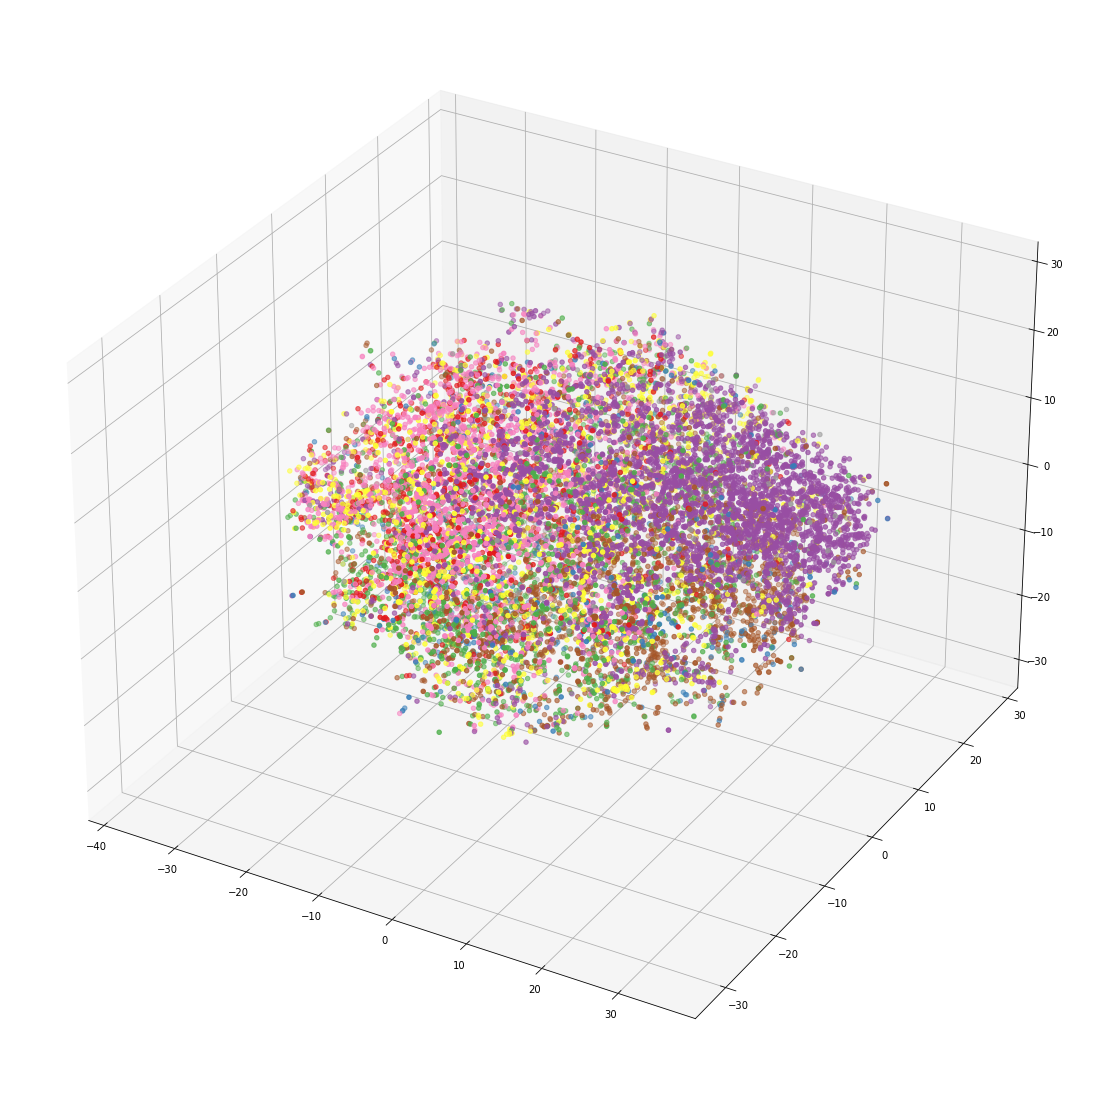

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt
from  mpl_toolkits.mplot3d import Axes3D

#df = pd.DataFrame(np.concatenate([X_embedded,data.label.values],axis=1),columns = ["x1","x2","label"])
# Use the 'hue' argument to provide a factor variable
#plt.figure(figsize=(15,15))
#sns.lmplot( x="x1", y="x2", data=df, fit_reg=False, hue='label', legend=False)

fig = plt.figure(figsize=(15,15))
ax = Axes3D(fig)
ax.scatter(df.x1,df.x2,df.x3,c = df.label.values,cmap='Set1')
plt.show()

In [23]:
%matplotlib

data1 = df[(df.label==1)|(df.label==7)]
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)
ax.scatter(data1.x1,data1.x2,data1.x3,c = data1.label.values,cmap='Set1')
plt.show()

Using matplotlib backend: MacOSX


In [24]:
pd.read_csv("./face_model/data/train_RAF_data.csv").label.value_counts()

3    3748
6    2089
4    1494
0    1065
2     615
5     546
1     212
Name: label, dtype: int64

In [2]:
aus = pd.read_csv("./face_model/data/data.csv")



In [68]:
angry_supply = aus[aus.label==0].copy()
angry_supply.label = 5
angry_supply = angry_supply[['face','label','confidence']+FEATURE_COLUMNS]
angry_supply = angry_supply.rename(columns = {"face":"imgID","confidence":' confidence'})
angry_supply

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,angry_actor_104.jpg,5,0.875,0.00,0.00,1.69,0.39,1.45,2.04,0.78,...,0,1,1,1,1,0,1,0,1,0
1,angry_actor_109.jpg,5,0.925,1.39,0.00,1.31,0.38,0.91,0.75,1.21,...,1,0,1,0,1,0,1,0,0,0
3,angry_actor_132.jpg,5,0.975,0.00,0.00,1.64,0.93,0.00,0.00,0.10,...,0,0,0,1,0,0,0,0,1,1
4,angry_actor_137.jpg,5,0.975,0.64,0.00,1.63,0.39,1.28,1.08,2.44,...,0,1,1,0,1,0,1,0,0,0
5,angry_actor_139.jpg,5,0.875,2.38,1.27,2.77,1.23,0.24,2.20,0.09,...,0,0,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32189,expressionless_father_318.jpg,5,0.025,2.86,0.73,0.00,1.22,2.45,2.17,0.00,...,1,1,1,1,1,0,1,0,1,0
32208,fear_old_435.jpg,5,0.675,2.10,0.00,0.00,0.16,1.16,1.92,1.00,...,0,0,1,0,1,1,1,1,0,0
32226,afraid_manager_398.jpg,5,0.825,0.00,0.00,1.20,0.66,0.91,1.62,0.78,...,1,0,1,0,0,1,1,1,1,0
32236,surprised_expression_241.jpg,5,0.925,0.00,0.00,0.29,1.37,0.00,0.00,0.02,...,0,0,1,0,0,0,1,1,0,0


In [73]:
angry_supply = angry_supply[angry_supply[" confidence"]>0.95]

In [71]:
train_RAF_data = pd.read_csv('./face_model/data/train_RAF_data.csv')
train_RAF_data.label.value_counts()



3    3748
6    2089
4    1494
0    1065
2     615
5     546
1     212
Name: label, dtype: int64

In [80]:
train_RAF_data_angry = pd.concat([train_RAF_data,angry_supply],axis=0)[['imgID','label',' confidence']+FEATURE_COLUMNS].reset_index().drop(['index'],axis=1)

In [81]:
train_RAF_data_angry.label.value_counts()

3    3748
6    2089
4    1494
5    1406
0    1065
2     615
1     212
Name: label, dtype: int64

In [82]:
train_RAF_data_angry.to_csv('./face_model/data/train_RAF_data_angry.csv',index=None)

In [84]:
from face_model.model_config import *
fear_supply = aus[aus.label==2].copy()
fear_supply.label=1
fear_supply = fear_supply[['face','label','confidence']+FEATURE_COLUMNS]
fear_supply = fear_supply.rename(columns = {"face":"imgID","confidence":' confidence'})

In [85]:
train_RAF_data_angry = pd.read_csv('./face_model/data/train_RAF_data_angry.csv')
train_RAF_data_angry = train_RAF_data_angry[fear_supply.columns]

In [86]:
train_RAF_data_angry.label.value_counts()

3    3748
6    2089
4    1494
5    1406
0    1065
2     615
1     212
Name: label, dtype: int64

In [87]:
train_RAF_data_angry_fear = pd.concat([train_RAF_data_angry,fear_supply],axis=0).reset_index().drop(['index'],axis=1)
train_RAF_data_angry_fear.head()

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,train_00001.jpg,4,0.975,0.00,0.0,0.0,0.00,1.20,0.87,0.34,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,train_00003.jpg,3,0.875,1.32,0.0,0.0,0.10,0.86,0.99,0.00,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,train_00004.jpg,3,0.925,0.00,0.0,0.0,0.00,0.23,0.00,0.00,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,train_00006.jpg,0,0.925,0.00,0.0,0.0,0.62,0.00,0.00,0.00,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,train_00007.jpg,4,0.975,0.00,0.0,0.0,0.26,0.47,0.09,1.09,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [88]:
train_RAF_data_angry_fear.label.value_counts()

3    3748
6    2089
4    1494
5    1406
0    1065
1     833
2     615
Name: label, dtype: int64

In [89]:
train_RAF_data_angry_fear.to_csv('./face_model/data/train_RAF_data_angry_fear.csv',index=None)

In [90]:
train_RAF_data_angry_fear.label.value_counts()

3    3748
6    2089
4    1494
5    1406
0    1065
1     833
2     615
Name: label, dtype: int64

In [91]:
train_RAF_data_angry_fear[train_RAF_data_angry_fear[" confidence"]>0.8].label.value_counts()

3    3632
6    2001
4    1423
5    1359
0     998
1     668
2     576
Name: label, dtype: int64

In [12]:
train_RAF_data_angry_fear

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,angry_actor_104.jpg,5,0.875,0.00,0.00,1.69,0.39,1.45,2.04,0.78,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,angry_actor_109.jpg,5,0.925,1.39,0.00,1.31,0.38,0.91,0.75,1.21,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,angry_actor_132.jpg,5,0.975,0.00,0.00,1.64,0.93,0.00,0.00,0.10,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,angry_actor_137.jpg,5,0.975,0.64,0.00,1.63,0.39,1.28,1.08,2.44,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,angry_actor_139.jpg,5,0.875,2.38,1.27,2.77,1.23,0.24,2.20,0.09,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12281,horrified_girl_331.jpg,1,0.825,2.36,2.09,0.00,2.05,1.25,0.00,0.35,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12282,afraid_student_6.jpg,1,0.875,0.00,0.00,1.76,0.00,0.51,0.00,0.71,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
12283,excited_boy_290.jpg,1,0.975,0.42,0.75,0.00,2.94,0.67,0.00,0.00,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
12284,afraid_woman_54.jpg,1,0.875,1.69,2.77,0.00,5.00,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0


In [92]:
disgust_supply = aus[aus.label==1].copy()
disgust_supply.label=2
disgust_supply = disgust_supply [['face','label','confidence']+FEATURE_COLUMNS]
disgust_supply = disgust_supply .rename(columns = {"face":"imgID","confidence":' confidence'})
disgust_supply

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
14,angry_actor_195.jpg,2,0.975,2.42,0.82,1.34,0.62,0.00,0.07,0.00,...,0,0,1,1,0,1,0,1,1,1
16,angry_actor_198.jpg,2,0.975,0.79,0.20,2.19,0.61,0.00,0.50,0.71,...,0,0,0,1,0,0,0,0,1,0
50,angry_actor_414.jpg,2,0.975,0.00,0.00,1.04,0.21,0.79,0.05,0.32,...,1,0,1,1,0,1,0,0,1,0
60,angry_actor_497.jpg,2,0.875,1.74,0.99,0.00,1.45,2.24,2.60,0.16,...,1,0,0,0,0,0,1,0,0,0
156,angry_american_730.jpg,2,0.775,1.39,0.00,1.50,0.05,0.72,2.82,0.24,...,0,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31583,amazed_son_318.jpg,2,0.925,0.00,0.00,0.18,0.62,0.00,0.00,0.96,...,0,0,1,0,0,1,0,1,0,0
32142,afraid_boy_154.jpg,2,0.975,0.49,0.00,0.00,0.95,0.01,0.25,0.24,...,0,0,0,0,0,0,1,1,0,0
32216,horrified_man_18.jpg,2,0.925,1.56,0.00,0.50,1.94,0.01,1.14,1.07,...,0,0,1,1,0,0,1,0,1,0
32243,surprised_expression_77.jpg,2,0.925,0.61,0.45,0.95,0.70,0.00,0.00,0.21,...,1,0,1,0,0,0,1,1,0,0


In [93]:
train_RAF_data_angry_fear.label.value_counts()

3    3748
6    2089
4    1494
5    1406
0    1065
1     833
2     615
Name: label, dtype: int64

In [94]:
disgust_supply = disgust_supply[disgust_supply[' confidence']>=0.95]

In [95]:
train_RAF_data_angry_fear_disgust = pd.concat([train_RAF_data_angry_fear,disgust_supply],axis=0).reset_index().drop(['index'],axis=1)
train_RAF_data_angry_fear_disgust.head()

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,train_00001.jpg,4,0.975,0.00,0.0,0.0,0.00,1.20,0.87,0.34,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,train_00003.jpg,3,0.875,1.32,0.0,0.0,0.10,0.86,0.99,0.00,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,train_00004.jpg,3,0.925,0.00,0.0,0.0,0.00,0.23,0.00,0.00,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,train_00006.jpg,0,0.925,0.00,0.0,0.0,0.62,0.00,0.00,0.00,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,train_00007.jpg,4,0.975,0.00,0.0,0.0,0.26,0.47,0.09,1.09,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [96]:
train_RAF_data_angry_fear_disgust.to_csv('./face_model/data/train_RAF_data_angry_fear_disgust.csv',index=None)

In [97]:
train_RAF_data_angry_fear_disgust.label.value_counts()

3    3748
6    2089
4    1494
5    1406
2    1336
0    1065
1     833
Name: label, dtype: int64

In [98]:
sad_supply = aus[aus.label==4].copy()
#disgust_supply.label=2
sad_supply = sad_supply[['face','label','confidence']+FEATURE_COLUMNS]
sad_supply = sad_supply.rename(columns = {"face":"imgID","confidence":' confidence'})
sad_supply

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
9,angry_actor_159.jpg,4,0.975,1.15,0.00,0.93,0.38,0.00,0.00,0.04,...,0,1,1,0,0,0,0,0,0,0
18,angry_actor_226.jpg,4,0.575,0.27,0.00,0.44,0.00,2.15,1.29,0.31,...,1,1,1,0,1,1,1,0,0,0
19,angry_actor_227.jpg,4,0.275,2.22,2.54,0.64,3.25,1.76,3.73,0.00,...,0,0,1,0,0,0,0,0,1,0
20,angry_actor_228.jpg,4,0.975,1.67,0.80,2.21,1.00,0.00,0.20,0.42,...,0,0,1,0,1,0,1,0,1,0
35,angry_actor_342.jpg,4,0.675,0.87,0.06,1.10,1.23,0.98,0.00,0.64,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32279,horrified_father_194.jpg,4,0.925,0.93,1.43,0.00,1.18,0.00,0.00,0.08,...,0,0,1,0,0,0,1,0,0,0
32292,horrified_infant_337.jpg,4,0.975,0.00,0.00,1.60,0.00,1.29,0.95,2.06,...,1,1,0,1,1,0,0,0,0,0
32327,ecstatic_old_157.jpg,4,0.025,0.57,0.58,1.55,0.00,1.79,1.60,1.13,...,1,0,0,0,0,0,1,0,0,1
32347,afraid_girl_13.jpg,4,0.975,1.40,0.44,0.39,0.63,1.33,0.00,0.00,...,1,0,0,1,1,0,0,0,1,0


In [99]:
sad_supply = sad_supply[sad_supply[" confidence"]>0.97].reset_index().drop(['index'],axis=1)

In [100]:
sad_supply = sad_supply[:600]
sad_supply

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,angry_actor_159.jpg,4,0.975,1.15,0.00,0.93,0.38,0.00,0.00,0.04,...,0,1,1,0,0,0,0,0,0,0
1,angry_actor_228.jpg,4,0.975,1.67,0.80,2.21,1.00,0.00,0.20,0.42,...,0,0,1,0,1,0,1,0,1,0
2,angry_actor_492.jpg,4,0.975,0.00,0.14,0.13,0.75,1.08,0.00,0.70,...,0,0,1,0,0,0,1,1,1,0
3,angry_actor_519.jpg,4,0.975,0.56,0.00,0.00,0.37,1.22,0.67,0.75,...,1,0,0,0,0,1,1,1,1,0
4,angry_actor_562.jpg,4,0.975,0.00,0.00,1.15,0.00,0.98,0.48,0.66,...,0,1,1,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,crying_face_160.jpg,4,0.975,1.38,0.71,0.24,0.13,1.10,3.45,0.00,...,1,1,1,0,1,0,1,0,0,1
596,crying_face_194.jpg,4,0.975,1.05,0.00,0.04,1.57,0.00,0.62,0.00,...,0,0,1,0,0,0,0,0,1,0
597,crying_face_459.jpg,4,0.975,0.00,0.00,0.53,0.00,0.75,2.69,2.07,...,0,1,1,1,1,1,1,1,0,0
598,crying_face_509.jpg,4,0.975,0.00,0.00,1.33,0.00,0.95,0.84,1.47,...,1,1,1,1,1,0,0,1,0,0


In [101]:
train_RAF_data_angry_fear_disgust_sad = pd.concat([train_RAF_data_angry_fear_disgust,sad_supply],axis=0).reset_index().drop(['index'],axis=1)
train_RAF_data_angry_fear_disgust_sad.head()

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,train_00001.jpg,4,0.975,0.00,0.0,0.0,0.00,1.20,0.87,0.34,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,train_00003.jpg,3,0.875,1.32,0.0,0.0,0.10,0.86,0.99,0.00,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,train_00004.jpg,3,0.925,0.00,0.0,0.0,0.00,0.23,0.00,0.00,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,train_00006.jpg,0,0.925,0.00,0.0,0.0,0.62,0.00,0.00,0.00,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,train_00007.jpg,4,0.975,0.00,0.0,0.0,0.26,0.47,0.09,1.09,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [102]:
train_RAF_data_angry_fear_disgust_sad.label.value_counts()

3    3748
4    2094
6    2089
5    1406
2    1336
0    1065
1     833
Name: label, dtype: int64

In [103]:
train_RAF_data_angry_fear_disgust_sad.to_csv("./face_model/data/train_RAF_data_angry_fear_disgust_sad.csv",index=None)

In [104]:
train_RAF_data_angry_fear_disgust_sad.label.value_counts()

3    3748
4    2094
6    2089
5    1406
2    1336
0    1065
1     833
Name: label, dtype: int64

In [107]:
temp = train_RAF_data_angry_fear_disgust_sad[train_RAF_data_angry_fear_disgust_sad.label!=3].copy()

In [112]:
part_of_happy = train_RAF_data_angry_fear_disgust_sad[train_RAF_data_angry_fear_disgust_sad.label==3].reset_index().drop(['index'],axis=1)

In [117]:
part_of_happy = part_of_happy[part_of_happy[" confidence"]>0.9].copy()

In [118]:
train_RAF_data_sub_happy = pd.concat([temp,part_of_happy],axis=0).reset_index().drop(['index'],axis=1)
train_RAF_data_sub_happy.head()

,imgID,label,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,train_00001.jpg,4,0.975,0.00,0.0,0.0,0.00,1.20,0.87,0.34,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,train_00006.jpg,0,0.925,0.00,0.0,0.0,0.62,0.00,0.00,0.00,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,train_00007.jpg,4,0.975,0.00,0.0,0.0,0.26,0.47,0.09,1.09,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,train_00012.jpg,0,0.975,0.00,0.0,0.0,0.34,1.05,0.00,0.27,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
4,train_00013.jpg,0,0.875,0.34,0.0,0.0,0.00,1.61,0.00,0.78,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [119]:
train_RAF_data_sub_happy.label.value_counts()

4    2094
6    2089
3    1458
5    1406
2    1336
0    1065
1     833
Name: label, dtype: int64

In [120]:
train_RAF_data_sub_happy.to_csv("./face_model/data/train_RAF_data_sub_happy.csv",index=None)

In [2]:
import sys
import time
import os
sys.path.append(os.getcwd())
from face_model.model_config import *
from face_model.models import *
from face_model.common import *
from torch.utils.data import TensorDataset,DataLoader
from torch.utils.tensorboard import SummaryWriter  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd 

data = pd.read_csv("./face_model/data/test_RAF_data.csv")
#data = data[data[" confidence"]>CONFIDENCE_THRESHOLD]
#data.label = [7 if data.loc[i," confidence"]<CONFIDENCE_THRESHOLD else data.loc[i,"label"] for i in range(data.shape[0])]

#labels = data.label 
#data = data.drop(['label'],axis=1)
#X_train,X_valid, y_train, y_valid = train_test_split(data,labels,test_size=0.3,stratify = labels)


X_test = torch.Tensor(data[FEATURE_COLUMNS].values)
X_test.shape

torch.Size([2445, 36])

In [3]:
model = NN(36,(32,128,256,512,256,128,32),7,None)
model.load_state_dict(torch.load('./face_model/results/best_model.pkl',map_location=torch.device('cpu')))
model.eval()

RuntimeError: Error(s) in loading state_dict for NN:
	Missing key(s) in state_dict: "hidden_0.weight", "hidden_0.bias", "hidden_1.weight", "hidden_1.bias", "hidden_2.weight", "hidden_2.bias", "hidden_3.weight", "hidden_3.bias", "hidden_4.weight", "hidden_4.bias", "hidden_5.weight", "hidden_5.bias", "hidden_6.weight", "hidden_6.bias", "bn0.weight", "bn0.bias", "bn0.running_mean", "bn0.running_var". 
	Unexpected key(s) in state_dict: "fc.weight", "fc.bias", "h1.weight", "h1.bias", "h2.weight", "h2.bias", "h3.weight", "h3.bias", "h4.weight", "h4.bias", "h5.weight", "h5.bias", "h6.weight", "h6.bias", "bn7.weight", "bn7.bias", "bn7.running_mean", "bn7.running_var", "bn7.num_batches_tracked". 
	size mismatch for bn1.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for bn1.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for bn1.running_mean: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for bn1.running_var: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for bn2.weight: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for bn2.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for bn2.running_mean: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for bn2.running_var: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for bn3.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for bn3.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for bn3.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for bn3.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for bn4.weight: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for bn4.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for bn4.running_mean: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for bn4.running_var: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for bn5.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for bn5.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for bn5.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for bn5.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for bn6.weight: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for bn6.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for bn6.running_mean: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for bn6.running_var: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([32]).

In [24]:
pre = model(X_test)

In [25]:
values,top = pre.detach().cpu().sort()

In [26]:
top

tensor([[1, 3, 5,  ..., 0, 2, 6],
        [1, 5, 3,  ..., 2, 4, 6],
        [3, 1, 5,  ..., 2, 0, 6],
        ...,
        [3, 0, 6,  ..., 4, 2, 5],
        [1, 5, 0,  ..., 4, 3, 6],
        [5, 1, 2,  ..., 4, 0, 6]])

In [27]:
data.label

0       4
1       0
2       0
3       4
4       2
       ..
2440    6
2441    6
2442    6
2443    6
2444    6
Name: label, Length: 2445, dtype: int64

In [110]:
categary_cols  = FEATURE_COLUMNS[18:]
wide_cols = []
for i in range(len(categary_cols)):
    for j in range(i+1,len(categary_cols)):
        new_col  = categary_cols[i][1:]+"_"+categary_cols[j][1:]
        train_data[new_col] = train_data.loc[:,categary_cols[i]]*train_data.loc[:,categary_cols[j]]
        wide_cols.append(new_col)
#wide_cols

In [116]:
em = torch.nn.Embedding(2,7)
em(torch.tensor([0]))

tensor([[ 1.8857, -0.2938, -0.8705, -1.7316, -1.8178, -0.8022,  2.4085]],
       grad_fn=<EmbeddingBackward>)

In [120]:
train_data.loc[:,[" AU04_c"," AU02_c","AU01_c_AU02_c"]].describe()

,AU04_c,AU02_c,AU01_c_AU02_c
count,9804.000000,9804.000000,9804.000000
mean,0.550388,0.458180,0.238576
std,0.497480,0.498273,0.426235
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


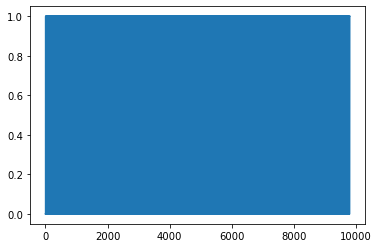

In [1]:
from face_model.models import *
from face_model.common import *
from face_model.model_config import *
import pandas as pd
embeddings_input = [(col,2,7) for col in FEATURE_COLUMNS[18:]]
column_idx = {col:index for index,col in enumerate(FEATURE_COLUMNS)}
continuous_cols = FEATURE_COLUMNS[:18]
categary_cols = FEATURE_COLUMNS[18:]
wide_cols = [' AU05_r',' AU06_r']
hidden_layers  = [16,32,16]
dropout = None
n_class = 7
model = Deep_Wide_NN(embeddings_input,column_idx,continuous_cols,\
                     categary_cols,wide_cols,hidden_layers,dropout,n_class)

model

Deep_Wide_NN(
  (emb_AU01_c): Embedding(2, 7, padding_idx=0)
  (emb_AU02_c): Embedding(2, 7, padding_idx=0)
  (emb_AU04_c): Embedding(2, 7, padding_idx=0)
  (emb_AU05_c): Embedding(2, 7, padding_idx=0)
  (emb_AU06_c): Embedding(2, 7, padding_idx=0)
  (emb_AU07_c): Embedding(2, 7, padding_idx=0)
  (emb_AU09_c): Embedding(2, 7, padding_idx=0)
  (emb_AU10_c): Embedding(2, 7, padding_idx=0)
  (emb_AU12_c): Embedding(2, 7, padding_idx=0)
  (emb_AU14_c): Embedding(2, 7, padding_idx=0)
  (emb_AU15_c): Embedding(2, 7, padding_idx=0)
  (emb_AU17_c): Embedding(2, 7, padding_idx=0)
  (emb_AU20_c): Embedding(2, 7, padding_idx=0)
  (emb_AU23_c): Embedding(2, 7, padding_idx=0)
  (emb_AU25_c): Embedding(2, 7, padding_idx=0)
  (emb_AU26_c): Embedding(2, 7, padding_idx=0)
  (emb_AU28_c): Embedding(2, 7, padding_idx=0)
  (emb_AU45_c): Embedding(2, 7, padding_idx=0)
  (linear_1): Linear(in_features=144, out_features=16, bias=True)
  (linear_2): Linear(in_features=16, out_features=32, bias=True)
  (linear

In [2]:
train_df = pd.read_csv('./face_model/data/train_RAF_data.csv')
test_df = pd.read_csv('./face_model/data/test_RAF_data.csv')
results = prepare_data(train_df,test_df,'Deep_Wide_nn',0.8,1024,1024)

In [3]:
results['X_train']

tensor([[-0.8637, -0.2772, -0.2120,  ...,  0.0000,  0.0000,  0.0000],
        [-1.9635, -0.5130, -0.2120,  ...,  0.0000,  0.0000,  0.0000],
        [ 1.3360, -0.5130, -0.2120,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.2361,  3.3248,  0.1743,  ...,  0.0000,  1.0000,  0.0000],
        [-0.8637, -0.5130, -0.2120,  ...,  0.0000,  0.0000,  0.0000],
        [ 1.3360,  0.0230, -0.2120,  ...,  0.0000,  0.0000,  0.0000]])

In [4]:
train_df.head()


,Unnamed: 0,Unnamed: 0.1,face,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,...,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,imgID,label,new_col1
0,2445,2445,0,0.975,0.00,0.0,0.0,0.00,1.20,0.87,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train_00001.jpg,4,0.0
1,2446,2446,0,0.875,1.32,0.0,0.0,0.10,0.86,0.99,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,train_00003.jpg,3,0.0
2,2447,2447,0,0.925,0.00,0.0,0.0,0.00,0.23,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train_00004.jpg,3,0.0
3,2448,2448,0,0.925,0.00,0.0,0.0,0.62,0.00,0.00,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,train_00006.jpg,0,0.0
4,2449,2449,0,0.975,0.00,0.0,0.0,0.26,0.47,0.09,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,train_00007.jpg,4,0.0


In [3]:
train_df['new_col1'] = train_df[' confidence']*train_df[' AU04_r']

In [25]:
train_df

,Unnamed: 0,Unnamed: 0.1,face,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,...,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,imgID,label,new_col
0,2445,2445,0,0.975,0.00,0.0,0.00,0.00,1.20,0.87,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train_00001.jpg,4,0.00000
1,2446,2446,0,0.875,1.32,0.0,0.00,0.10,0.86,0.99,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,train_00003.jpg,3,0.00000
2,2447,2447,0,0.925,0.00,0.0,0.00,0.00,0.23,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train_00004.jpg,3,0.00000
3,2448,2448,0,0.925,0.00,0.0,0.00,0.62,0.00,0.00,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,train_00006.jpg,0,0.00000
4,2449,2449,0,0.975,0.00,0.0,0.00,0.26,0.47,0.09,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,train_00007.jpg,4,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,12209,12209,0,0.925,0.00,0.0,0.70,0.00,0.42,0.76,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train_12266.jpg,6,0.64750
9765,12210,12210,0,0.975,0.12,0.0,2.18,0.00,0.60,0.00,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,train_12267.jpg,6,2.12550
9766,12211,12211,0,0.875,0.24,0.0,0.22,1.33,0.00,0.93,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,train_12268.jpg,6,0.19250
9767,12212,12212,0,0.975,0.93,0.0,0.28,0.57,0.00,0.12,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,train_12269.jpg,6,0.27300


In [17]:
temp_idx = [results['column_idx'][col] for col in results['continuous_cols']]
temp_idx

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [7]:
test_data = pd.read_csv("./face_model/data/test_RAF_data.csv")
test_data

,Unnamed: 0,Unnamed: 0.1,face,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,...,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,imgID,label
0,0,0,0,0.925,2.35,0.0,0.00,0.45,0.91,0.00,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,test_0001.jpg,4
1,1,1,0,0.975,1.39,0.0,0.00,0.25,0.00,0.10,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,test_0002.jpg,0
2,2,2,0,0.825,0.00,0.0,0.00,0.00,0.46,1.04,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,test_0004.jpg,0
3,3,3,0,0.875,0.00,0.0,0.00,0.00,0.44,0.00,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,test_0006.jpg,4
4,4,4,0,0.975,0.00,0.0,0.00,0.02,0.52,0.47,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,test_0007.jpg,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,2440,2440,0,0.975,0.00,0.0,0.33,0.08,0.00,0.15,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,test_3063.jpg,6
2441,2441,2441,0,0.875,0.07,0.0,0.00,0.00,0.00,0.00,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,test_3064.jpg,6
2442,2442,2442,0,0.975,0.00,0.0,0.04,0.00,0.68,1.70,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,test_3065.jpg,6
2443,2443,2443,0,0.975,0.00,0.0,0.00,0.00,1.16,0.17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,test_3066.jpg,6


In [8]:
test_data.label.value_counts()

3    935
6    568
4    342
0    271
2    140
5    131
1     58
Name: label, dtype: int64

In [9]:
EXPRESSION_LABEL

{'0': 'Surprise',
 '1': 'Fear',
 '2': 'Disgust',
 '3': 'Happiness',
 '4': 'Sadness',
 '5': 'Anger',
 '6': 'Neutral'}

In [12]:
test_happy = test_data[test_data.label==3]

In [14]:
test_happy

,Unnamed: 0,Unnamed: 0.1,face,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,...,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,imgID,label
6,6,6,0,0.875,0.00,0.0,0.00,0.00,2.14,0.00,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,test_0009.jpg,3
7,7,7,0,0.925,0.00,0.0,0.90,0.00,2.79,3.81,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,test_0010.jpg,3
9,9,9,0,0.875,0.00,0.0,0.01,0.00,2.45,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,test_0012.jpg,3
10,10,10,0,0.975,0.00,0.0,0.00,0.00,1.80,0.10,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,test_0014.jpg,3
12,12,12,0,0.975,1.82,0.0,0.00,0.00,0.50,0.02,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,test_0016.jpg,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,1746,1746,0,0.875,0.82,0.0,1.27,0.00,1.74,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,test_2231.jpg,3
1747,1747,1747,0,0.975,0.19,0.0,0.00,0.00,0.01,1.11,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,test_2233.jpg,3
1749,1749,1749,0,0.975,0.00,0.0,0.00,0.00,1.24,1.98,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,test_2235.jpg,3
1750,1750,1750,0,0.875,0.48,0.0,0.00,0.26,0.61,0.32,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,test_2236.jpg,3


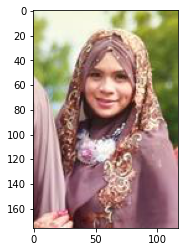

In [33]:
import matplotlib.pyplot as plt

img = plt.imread('/Users/andrew/Desktop/face_data/original/test_0014.jpg')
plt.imshow(img)
plt.show()

In [34]:
test_happy.shape

(935, 41)

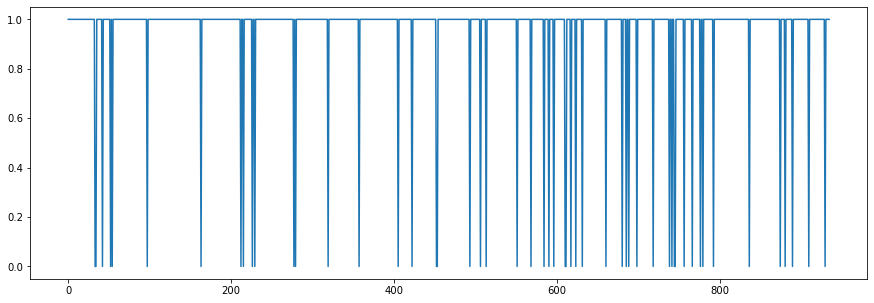

In [38]:
plt.figure(figsize=(15,5))
plt.plot(range(935),test_happy[' AU12_c'])
plt.show()

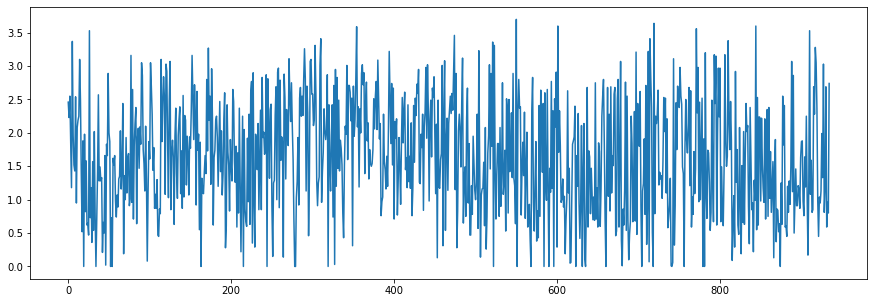

In [39]:
plt.figure(figsize=(15,5))
plt.plot(range(935),test_happy[' AU12_r'])
plt.show()

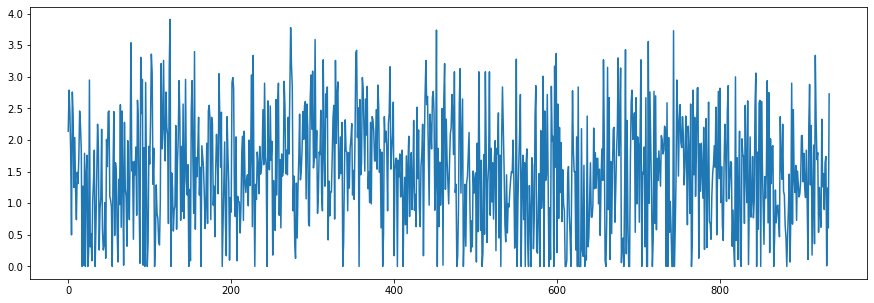

In [46]:
plt.figure(figsize=(15,5))
plt.plot(range(935),test_happy[' AU06_r'])
plt.show()

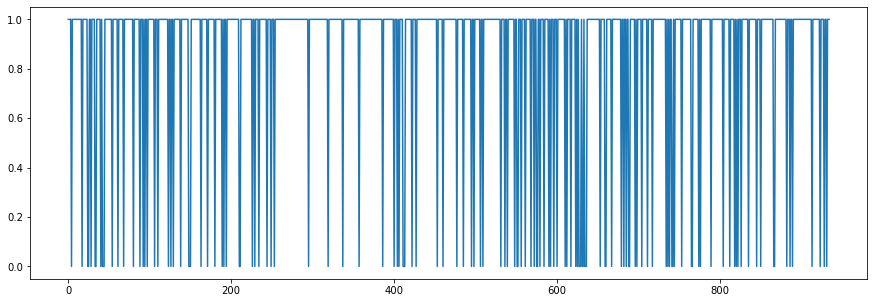

In [45]:
plt.figure(figsize=(15,5))
plt.plot(range(935),test_happy[' AU06_c'])
plt.show()

/Users/andrew/opt/miniconda3/envs/dp/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


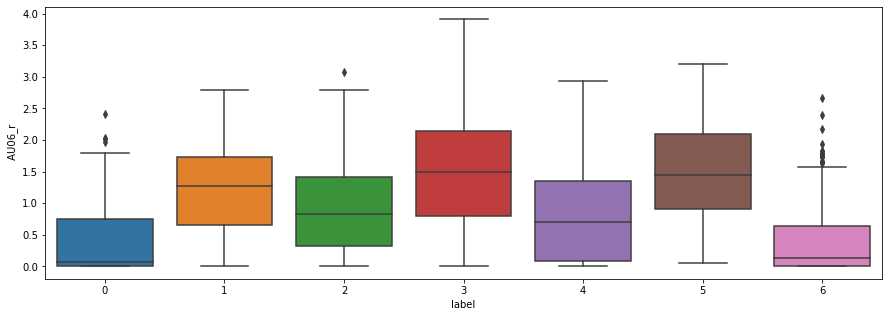

In [52]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.boxplot(test_data['label'],test_data[' AU06_r'])
plt.show()

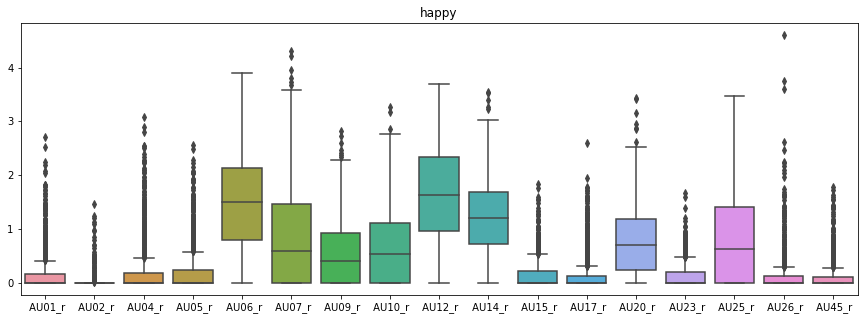

In [68]:
plt.figure(figsize=(15,5))
sns.boxplot(data = test_happy[FEATURE_COLUMNS[1:18]])
plt.title('happy')
plt.show()

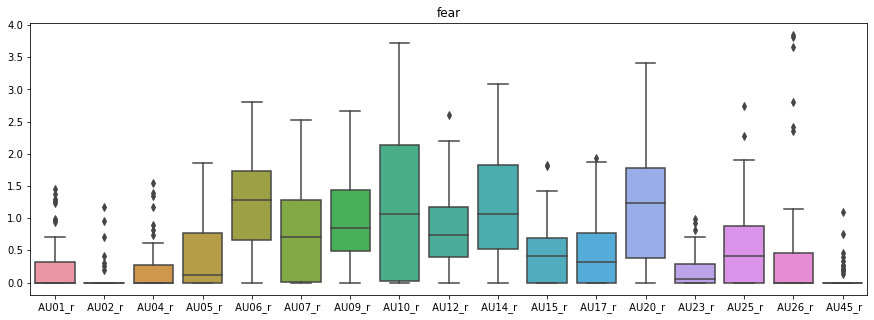

In [69]:
plt.figure(figsize=(15,5))
sns.boxplot(data = test_data[test_data.label==1][FEATURE_COLUMNS[1:18]])
plt.title('fear')
plt.show()

In [72]:
test_data[test_data.label==1].head(10)

,Unnamed: 0,Unnamed: 0.1,face,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,...,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,imgID,label
214,214,214,0,0.875,0.00,0.00,0.00,0.00,0.00,1.80,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,test_0274.jpg,1
289,289,289,0,0.875,1.27,0.26,0.45,0.00,1.09,2.03,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,test_0377.jpg,1
656,656,656,0,0.975,0.94,0.30,1.55,0.39,0.11,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,test_0859.jpg,1
1168,1168,1168,0,0.875,1.30,0.00,0.18,0.43,1.68,2.52,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,test_1477.jpg,1
1242,1242,1242,0,0.875,0.00,0.00,0.19,0.00,1.18,1.63,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,test_1569.jpg,1
1403,1403,1403,0,0.875,0.35,0.00,0.00,0.72,1.41,0.62,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,test_1788.jpg,1
1752,1752,1752,0,0.825,0.24,0.00,0.56,1.33,0.38,0.26,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,test_2239.jpg,1
1753,1753,1753,0,0.875,0.00,0.00,0.00,0.00,2.05,2.01,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,test_2240.jpg,1
1754,1754,1754,0,0.975,1.24,0.00,1.17,0.54,1.22,1.51,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,test_2241.jpg,1
1755,1755,1755,0,0.925,0.00,0.00,0.03,0.09,0.68,0.39,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,test_2242.jpg,1


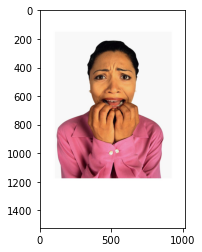

In [73]:
import matplotlib.pyplot as plt

img = plt.imread('/Users/andrew/Desktop/face_data/original/test_2241.jpg')
plt.imshow(img)
plt.show()

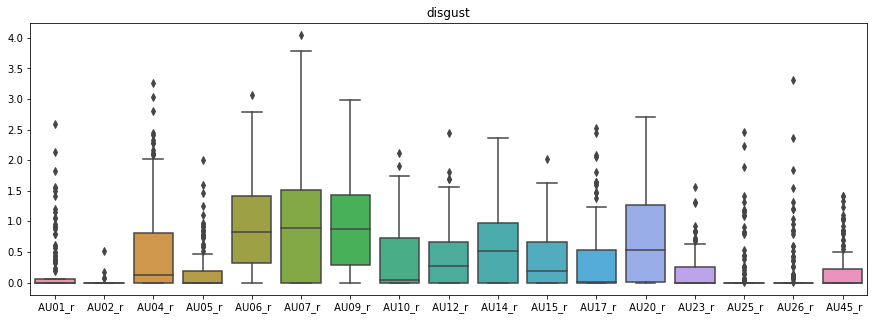

In [74]:
plt.figure(figsize=(15,5))
sns.boxplot(data = test_data[test_data.label==2][FEATURE_COLUMNS[1:18]])
plt.title('disgust')
plt.show()

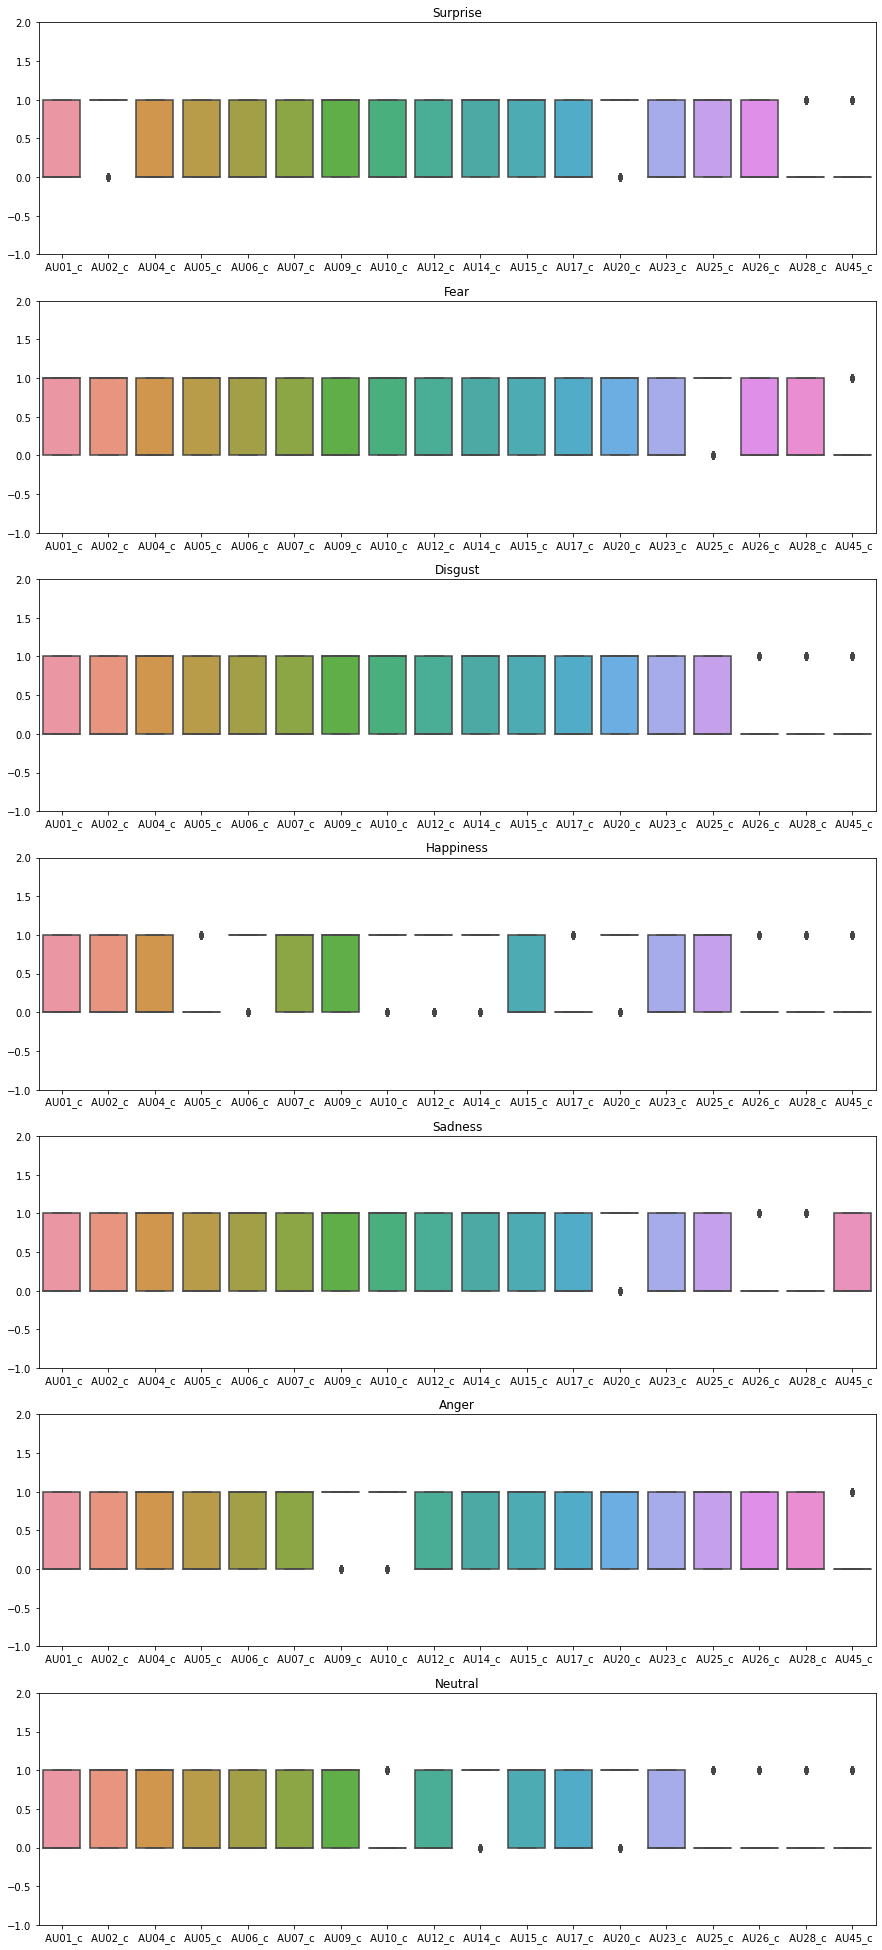

In [85]:
train_data = pd.read_csv("./face_model/data/train_RAF_data_sub_happy.csv")
train_data = train_data[train_data[' confidence']>0.8]
plt.figure(figsize=(15,35))
for i in range(7):
    plt.subplot(7,1,i+1)
    sns.boxplot(data = train_data[train_data.label==i][FEATURE_COLUMNS[18:]])
    plt.ylim((-1,2))
    plt.title(EXPRESSION_LABEL[str(i)])
plt.show()

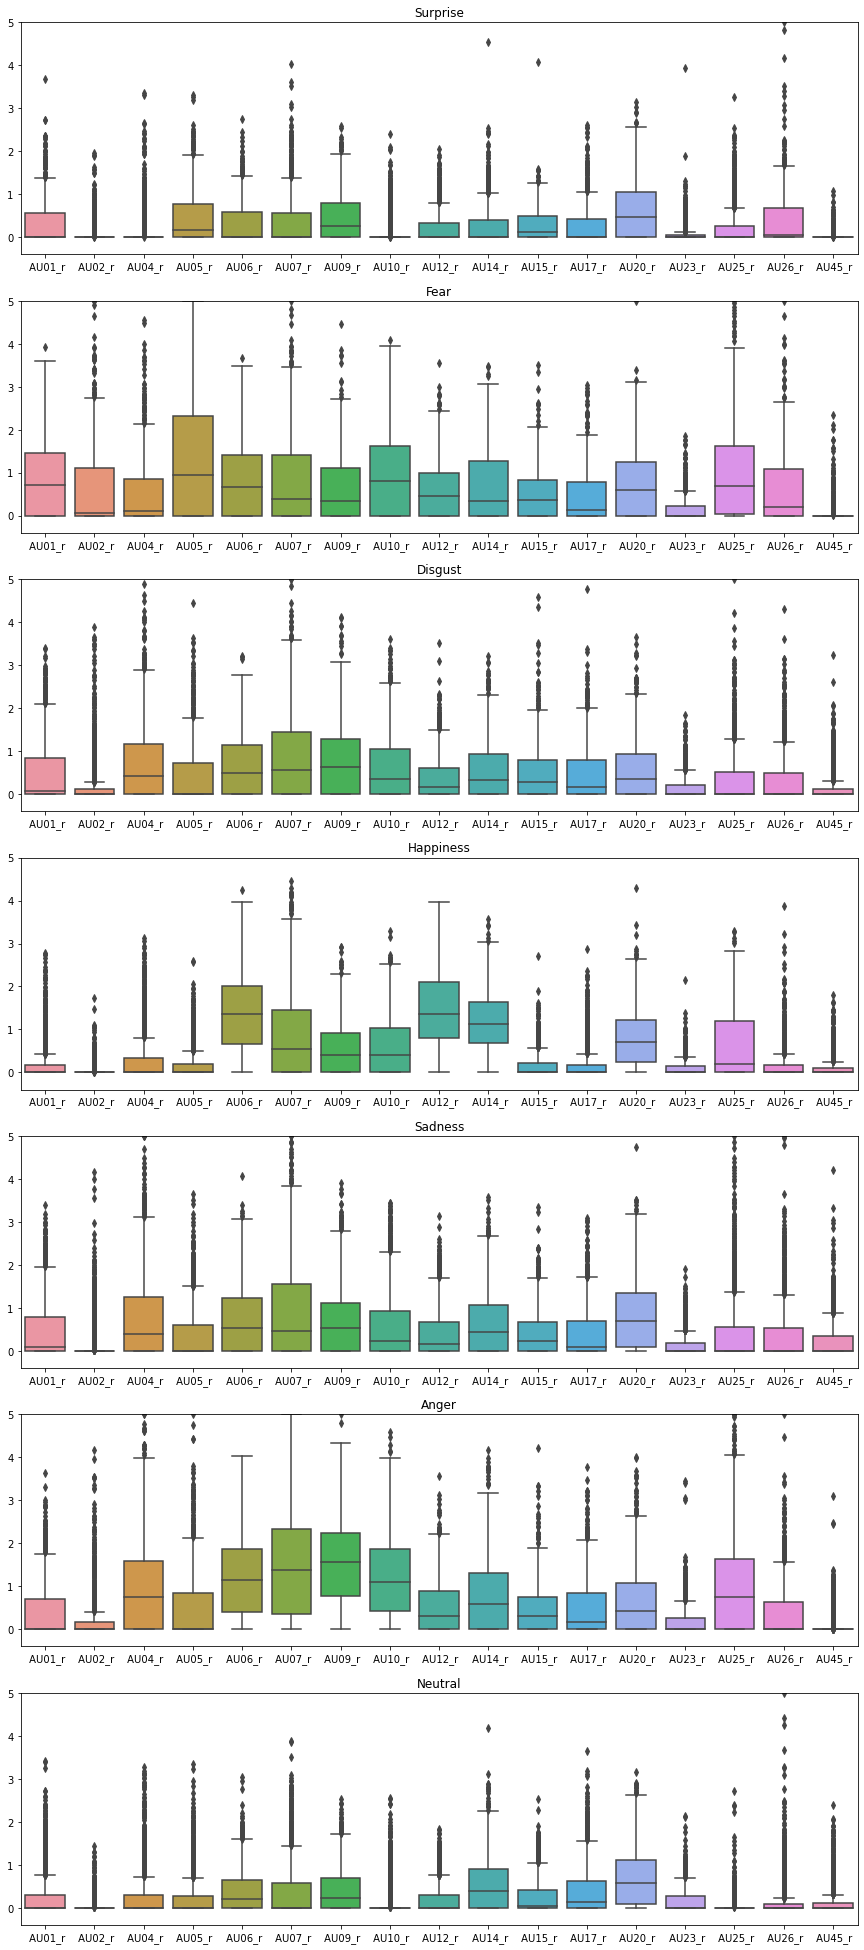

In [87]:
train_data = pd.read_csv("./face_model/data/train_RAF_data_sub_happy.csv")
train_data = train_data[train_data[' confidence']>0.8]
plt.figure(figsize=(15,35))
for i in range(7):
    plt.subplot(7,1,i+1)
    sns.boxplot(data = train_data[train_data.label==i][FEATURE_COLUMNS[1:18]])
    plt.ylim((-0.4,5))
    plt.title(EXPRESSION_LABEL[str(i)])
plt.show()